# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Trabajo Práctico 1</center>
## <center>Checkpoint 1</center>

#Inicio

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statistics import mode

db_url = 'https://raw.githubusercontent.com/FranGuti/7506R-1C2023-GRUPO34/main/Datasets/hotels_train.csv'
archivo_train = pd.read_csv(db_url)


In [45]:
def obtener_frecuencia_relativa(series):
    frecuencia_absoluta = series.value_counts()
    frecuencia_relativa = frecuencia_absoluta / frecuencia_absoluta.sum()
    return frecuencia_relativa





# Análisis exploratorio de los datos

## Análisis inicial

Observamos la estructura general del dataset.

In [ ]:
archivo_train.shape

(61913, 33)

In [ ]:
archivo_train.dtypes

hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           

In [42]:
columnas_cualitativas = [
    "hotel",
    "meal",
    "country",
    "market_segment",
    "distribution_channel",
    "deposit_type",
    "customer_type",
    "reservation_status",
    
   
]

variables_cualitativas = archivo_train[columnas_cualitativas]

columnas_cuantitativas_discretas = [
    "lead_time",
    "arrival_date_year",
    "arrival_date_week_number",
    "arrival_date_day_of_month",
    "stays_in_weekend_nights",
    "stays_in_week_nights",
    "adults",
    "children",
    "babies",
    "booking_changes",
    "days_in_waiting_list",
    "total_of_special_requests",
    "previous_cancellations",
    "previous_bookings_not_canceled",
    "required_car_parking_spaces"
]

variables_cuantitativas_discretas = archivo_train[columnas_cuantitativas_discretas]

columnas_cuantitativas_continuas = [
    "adr",
]

variables_cuantitativas_continuas = archivo_train[columnas_cuantitativas_continuas]

columnas_cuasicuantitativas = [
    "arrival_date_month",
    "is_repeated_guest",    
    "reserved_room_type",
    "assigned_room_type",
    "required_car_parking_spaces",
    "reservation_status_date",
    "agent",
    "company",
     "id"
]

variables_cuasicuantitativas = archivo_train[columnas_cuasicuantitativas]

In [ ]:
archivo_train.head(5)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,NaN,0,Transient,115.5,0,1,Canceled,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,NaN,0,Transient,42.0,1,0,Check-Out,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,NaN,0,Transient,229.0,0,2,Check-Out,2016-10-14,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,NaN,0,Transient,75.0,0,0,Canceled,2016-11-29,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,NaN,0,Transient-Party,75.0,0,1,Check-Out,2017-03-26,28c75445-c603-413a-babf-ad377018b592,0


###Análisis inicial variables cuantitativas discretas




In [ ]:

variables_cuantitativas_discretas.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,booking_changes,days_in_waiting_list,total_of_special_requests
0,49,2016,37,5,1,2,1,0.0,0,0,0,1
1,4,2015,44,31,0,1,2,0.0,0,0,0,0
2,25,2016,42,13,0,1,2,2.0,0,0,0,2
3,26,2016,51,12,2,5,2,0.0,0,0,0,0
4,104,2017,12,19,2,5,2,0.0,0,0,0,1


####Variable previous_bookings_not_canceled

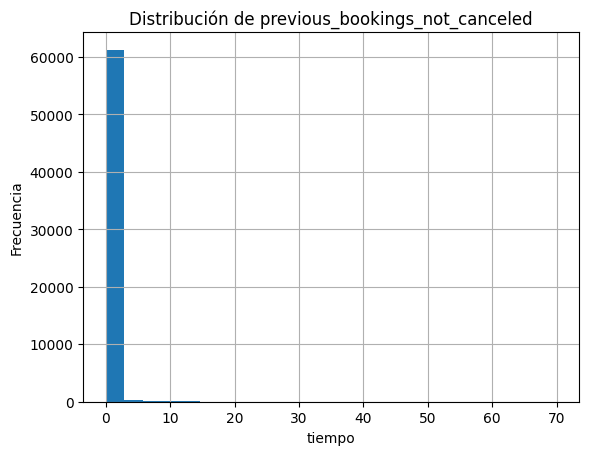

In [ ]:
plt.title('Distribución de previous_bookings_not_canceled')
plt.hist(archivo_train['previous_bookings_not_canceled'], bins = 24 , alpha = 1)
plt.xlabel("tiempo")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

Casi todos huéspedes que hacen reservas no tuvieron reservas previas canceladas

Veo su relación con el target graficando su distribución con un gráfico de a pares contrastando con la variable is_canceled


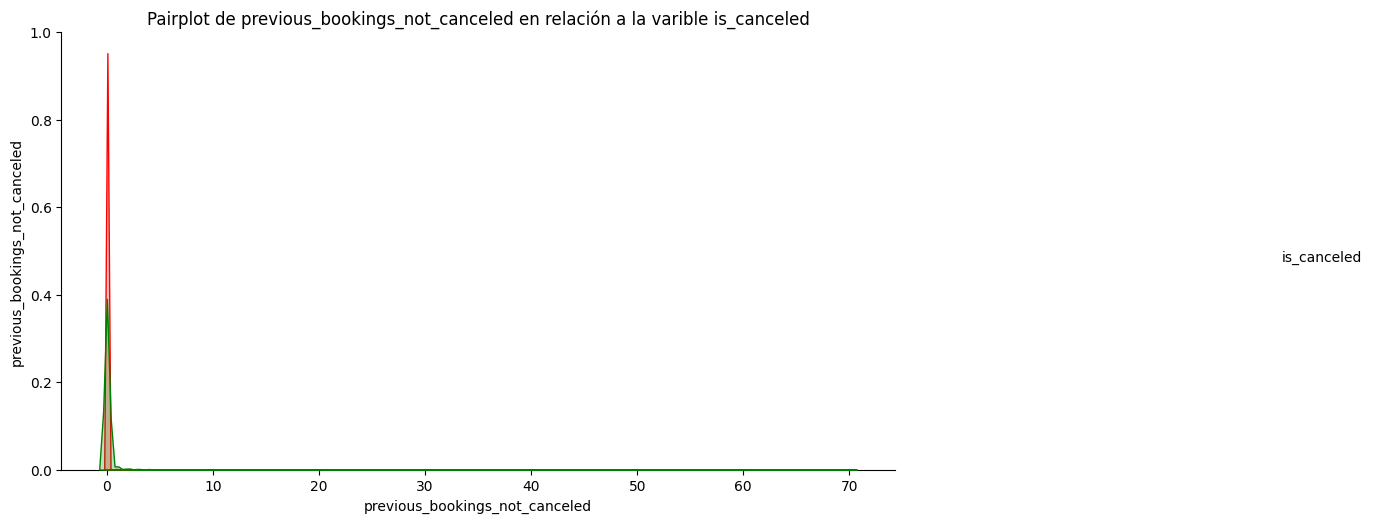

In [ ]:
columns=['previous_bookings_not_canceled', 'is_canceled']
ds_pairplot=archivo_train[columns].copy()
graf_pairplot=sns.pairplot(data=ds_pairplot, hue="is_canceled", palette=["g", "r"]).set(title="Pairplot de previous_bookings_not_canceled en relación a la varible is_canceled")
graf_pairplot.fig.set_size_inches(16,6)

La gran mayoría que no tenía reservas previas no canceladas han cancelado

####Variable lead_time

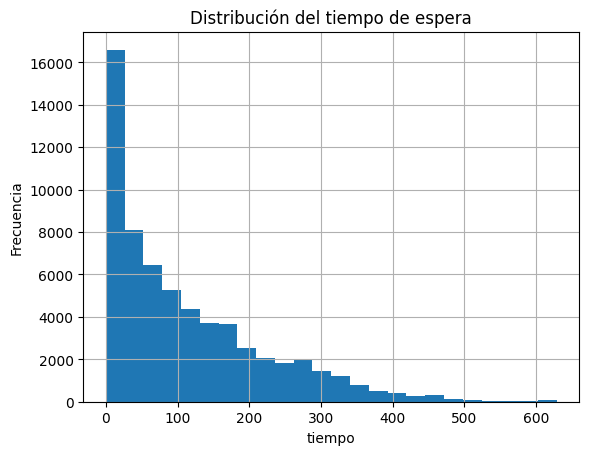

In [ ]:
plt.title('Distribución del tiempo de espera')
plt.hist(archivo_train['lead_time'], bins = 24 , alpha = 1)
plt.xlabel("tiempo")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

La mayoría de los huespedes esperan poco, mientras la cantidad de tiempo aumenta, los huespedes esperando disminuyen aceleradamente de manera continua

Veo su relación con el target graficando su distribución con un gráfico de a pares contrastando con la variable is_canceled

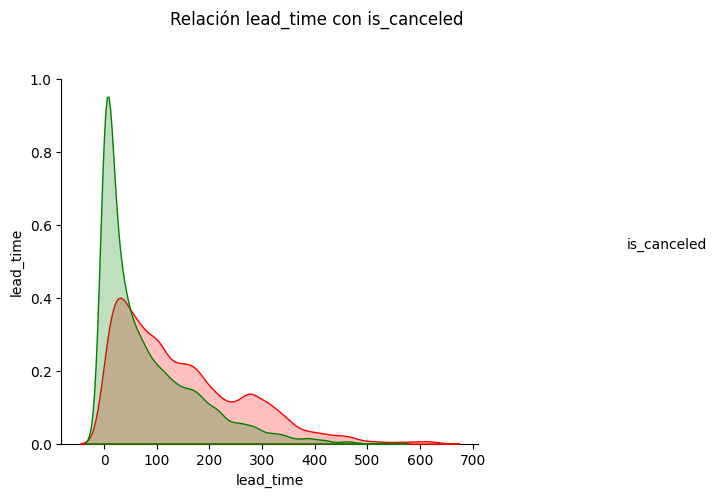

In [ ]:
columns=['lead_time', 'is_canceled']
ds_pairplot=archivo_train[columns].copy()
graf_pairplot=sns.pairplot(data=ds_pairplot, hue="is_canceled", palette=["g", "r"])
graf_pairplot.fig.suptitle("Relación lead_time con is_canceled", y=1.08) 
graf_pairplot.fig.set_size_inches(8,5)

Se puede apreciar que en el inicio, como es de esperar, al haber poca demora hay mas hospedados que cancelados, y a medida que aumenta el tiempo de espera la cantidad de cancelados supera a la de hospedados

####Variable arrival_date_year

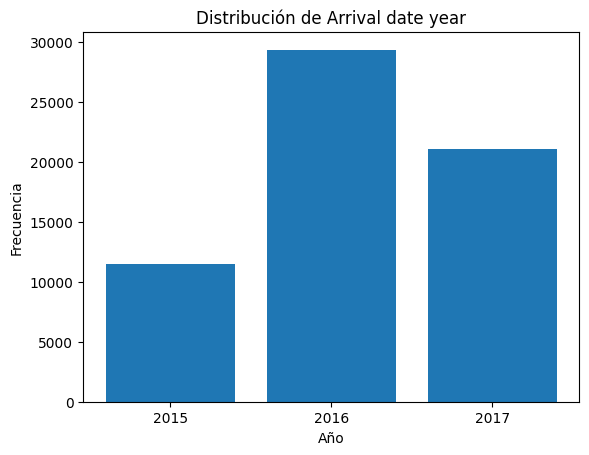

In [ ]:
ds_agrupado_ady=archivo_train.groupby(['arrival_date_year']).count()

eje_x = [2015, 2016, 2017]
eje_y = ds_agrupado_ady['hotel'].tolist()

plt.locator_params('x', nbins=3)
plt.bar(eje_x, eje_y)

plt.ylabel('Frecuencia')
plt.xlabel('Año')
plt.title('Distribución de Arrival date year')
 
plt.show()

La mayor cantidad de reservas en nuestro dataset son en 2016, 2017 y 2015 respectivamente

Veo su relación con el target graficando su distribución con un 
gráfico de a pares contrastando con la variable is_canceled

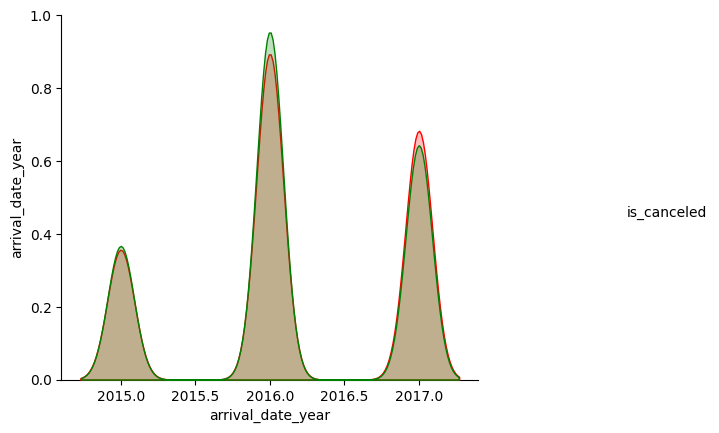

In [ ]:
columns=['arrival_date_year', 'is_canceled']
ds_pairplot=archivo_train[columns].copy()
graf_pairplot=sns.pairplot(data=ds_pairplot, hue="is_canceled", palette=["g", "r"])
graf_pairplot.fig.suptitle("Relación arrival_date_year con is_canceled", y=1.08)
graf_pairplot.fig.set_size_inches(8,5)

Se puede apreciar que en el 2015 la proporcion cancelados-hospedados es bastante parjea, mientras que en el 2016 la de hospedados superó a la de cancelados, y en el 2017 sucedió todo lo contrario

####Variable arrival_date_week_number

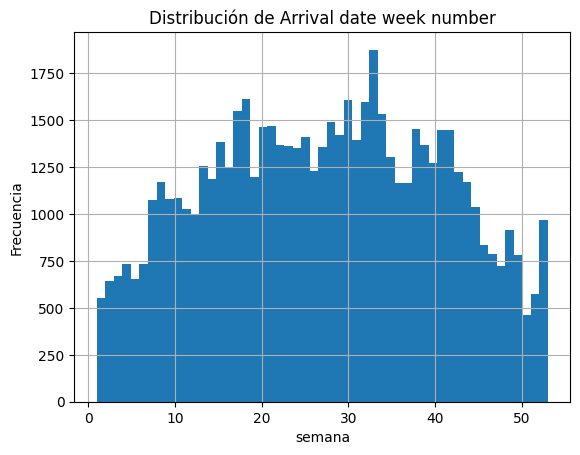

In [ ]:
plt.title('Distribución de Arrival date week number')
plt.hist(archivo_train['arrival_date_week_number'], bins = 53 , alpha = 1)
plt.xlabel("semana")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

La mayor cantidad de arrivos ocurren entre las semanas 15 y 42

Veo su relación con el target graficando su distribución con un gráfico de a pares contrastando con la variable is_canceled

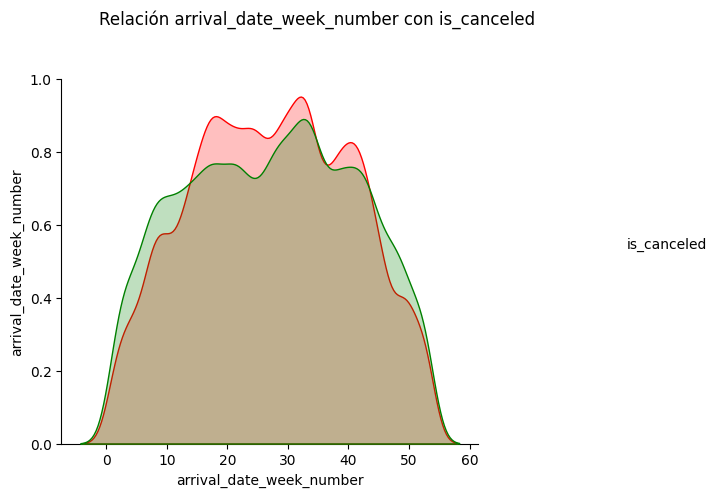

In [ ]:

columns=['arrival_date_week_number', 'is_canceled']
ds_pairplot=archivo_train[columns].copy()
graf_pairplot=sns.pairplot(data=ds_pairplot, hue="is_canceled", palette=["g", "r"])
graf_pairplot.fig.suptitle("Relación arrival_date_week_number con is_canceled", y=1.08)
graf_pairplot.fig.set_size_inches(8,5)

Observo que entre la semana 0 y 15 aproximadamente la cantidad de hospedados supera a la de cancelados, tendencia que se revierte durante las semanas 15 a 45 aproximadamente, luego vuelve a como estaba antes de la semana 45 en adelante

####Variable arrival_date_day_of_month

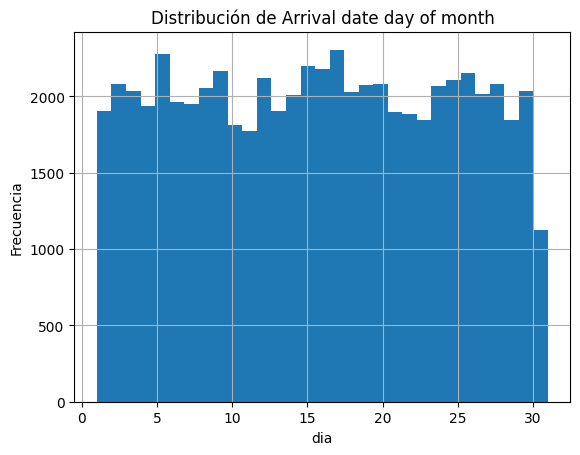

In [ ]:
plt.title('Distribución de Arrival date day of month')
plt.hist(archivo_train['arrival_date_day_of_month'], bins = 31 , alpha = 1)
plt.xlabel("dia")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

El día 31 es cuando se registran menos arrivos(pocos meses tienen 31 dias)

Del 10 al 15 y del 20 al 25 también hay menos arribos

Veo su relación con el target graficando su distribución con un gráfico de a pares contrastando con la variable is_canceled

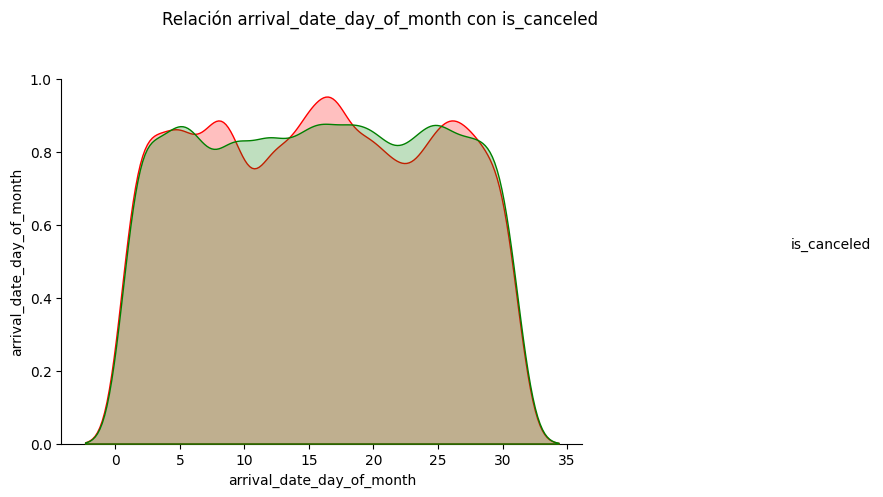

In [ ]:
columns=['arrival_date_day_of_month', 'is_canceled']
ds_pairplot=archivo_train[columns].copy()
graf_pairplot=sns.pairplot(data=ds_pairplot, hue="is_canceled", palette=["g", "r"])
graf_pairplot.fig.suptitle("Relación arrival_date_day_of_month con is_canceled", y=1.08)
graf_pairplot.fig.set_size_inches(10,5)

Se puede apreciar que entre, aproximandamente, el dia 6 y dia 8 el numero de cancelados es superior al de no-cancelado al igual que pasa entre aproximadamente el dia 13 y 18, y 26 y 28. El resto de dias la paridad es casi del 1 a 1 excepto por los intervalos: dia 9-14 (aprox), dia 18-26(aprox) donde la cantidad de no-cancelados es notoriamente superior a la de cancelados

####Variable stays_in_weekend_nights

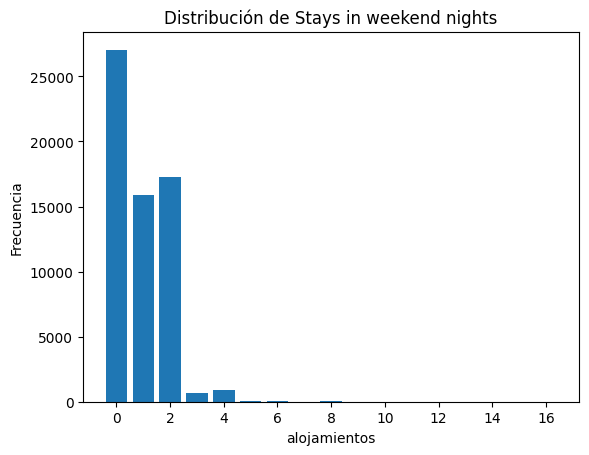

In [ ]:
ds_agrupado_siwn=archivo_train.groupby(['stays_in_weekend_nights']).count()

eje_x = ds_agrupado_siwn.index.tolist()
eje_y = ds_agrupado_siwn['hotel'].tolist()

plt.locator_params('x', nbins=16)
plt.bar(eje_x, eje_y)

plt.ylabel('Frecuencia')
plt.xlabel('alojamientos')
plt.title('Distribución de Stays in weekend nights')
 
plt.show()

No suelen quedarse las noches de fines de semana, a lo sumo una o dos noches




Veo su relación con el target graficando su distribución con un gráfico de a pares contrastando con la variable is_canceled

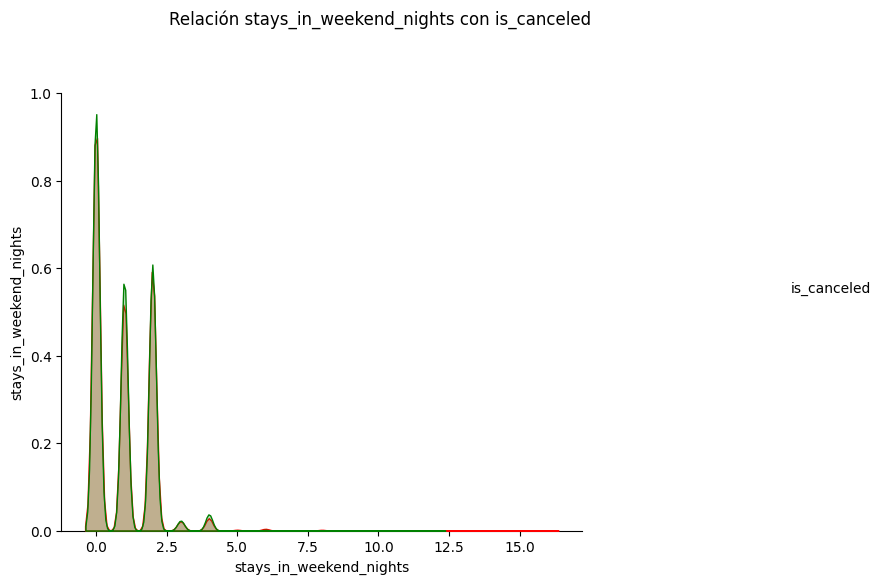

In [ ]:
columns=['stays_in_weekend_nights', 'is_canceled']
ds_pairplot=archivo_train[columns].copy()
graf_pairplot=sns.pairplot(data=ds_pairplot, hue="is_canceled", palette=["g", "r"])
graf_pairplot.fig.suptitle("Relación stays_in_weekend_nights con is_canceled", y=1.08)
graf_pairplot.fig.set_size_inches(10,6)

Si bien en los casos donde se quedaron almenos una noche de fin de semana pareciera que hay mas no-cancelados que cancelados, podemos observar que cuando esta variable es 0 también sucede lo mismo.

Además, cuando se llega a los numeros mas elevados de noches la tendencia cambia y pareciera haber mas cancelaciones. Dato que puede llegar a ser despreciable al tratarse de casos outliers


####Variable stays_in_week_nights

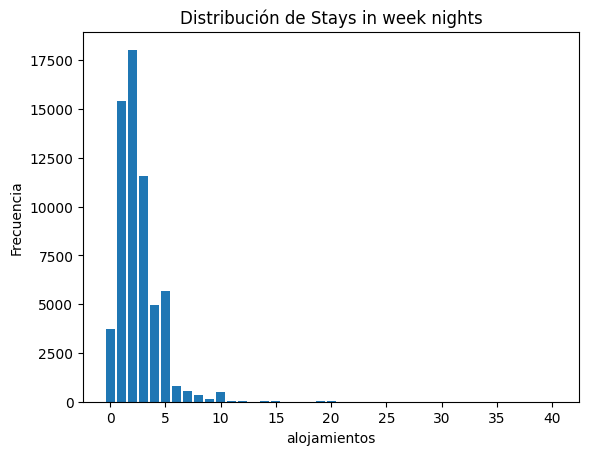

In [ ]:
ds_agrupado_siwn=archivo_train.groupby(['stays_in_week_nights']).count()

eje_x = ds_agrupado_siwn.index.tolist()
eje_y = ds_agrupado_siwn['hotel'].tolist()

plt.locator_params('x', nbins=16)
plt.bar(eje_x, eje_y)

plt.ylabel('Frecuencia')
plt.xlabel('alojamientos')
plt.title('Distribución de Stays in week nights')
 
plt.show()

A diferencia con las noches de fines de semana, si se quedan en la semana hasta 5 noches suele ser lo normal




Veo su relación con el target:

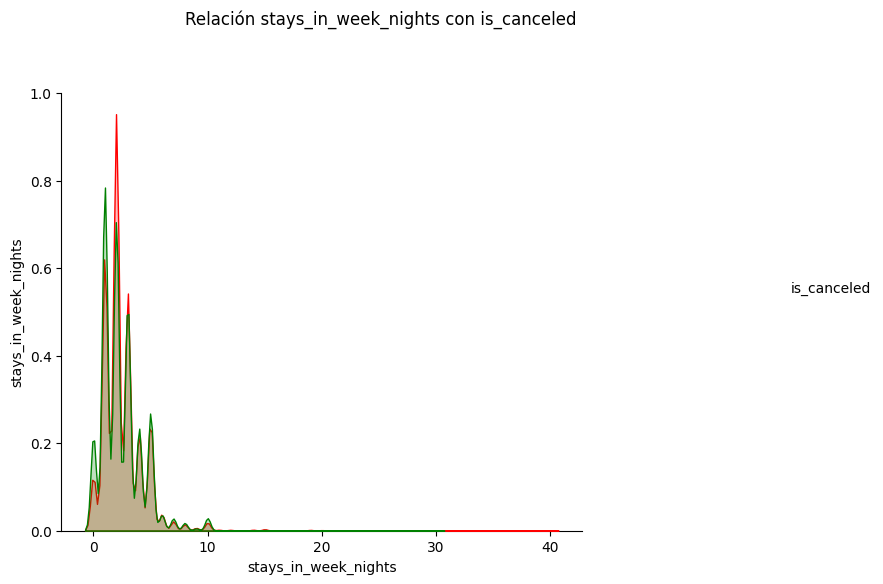

In [ ]:
columns=['stays_in_week_nights', 'is_canceled']
ds_pairplot=archivo_train[columns].copy()
graf_pairplot=sns.pairplot(data=ds_pairplot, hue="is_canceled", palette=["g", "r"])
graf_pairplot.fig.suptitle("Relación stays_in_week_nights con is_canceled", y=1.08)
graf_pairplot.fig.set_size_inches(10,6)

Cuando no se queda ninguna noche de semana es el momento en el que mejor ratio de no-cancelados/cancelados hay, el sigueinte es cuando se queda solo una noche, luego cuando son 2 o 3 noches suele haber mas cancelados que no-cancelados

####Variable adults

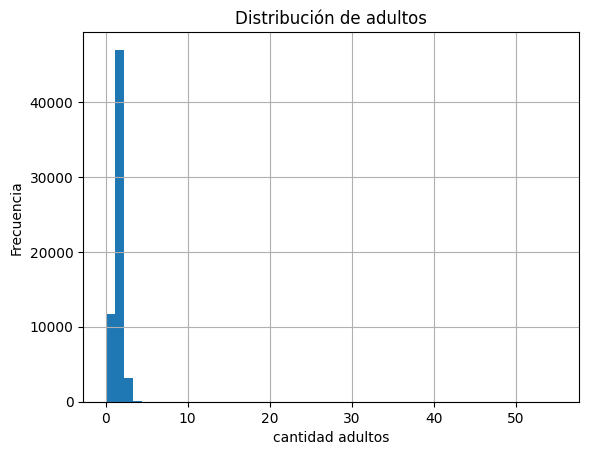

In [ ]:
plt.title('Distribución de adultos')
plt.hist(archivo_train['adults'], bins = 50 , alpha = 1)
plt.xlabel("cantidad adultos")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

Suelen alojarse dos adultos




Veo su relación con el target graficando su distribución con un gráfico de a pares contrastando con la variable is_canceled

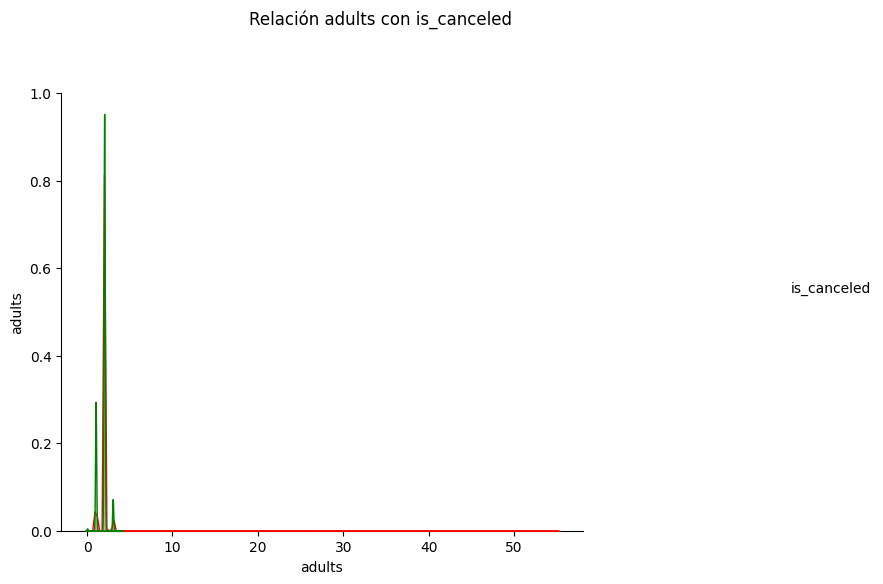

In [ ]:
columns=['adults', 'is_canceled']
ds_pairplot=archivo_train[columns].copy()
graf_pairplot=sns.pairplot(data=ds_pairplot, hue="is_canceled", palette=["g", "r"])
graf_pairplot.fig.suptitle("Relación adults con is_canceled", y=1.08)
graf_pairplot.fig.set_size_inches(10,6)

####Variable children

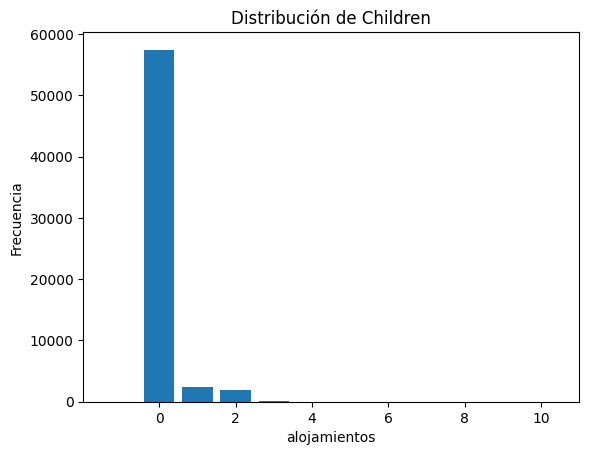

In [ ]:
ds_agrupado_children=archivo_train.groupby(['children']).count()

eje_x = ds_agrupado_children.index.tolist()
eje_y = ds_agrupado_children['hotel'].tolist()

plt.locator_params('x', nbins=12)
plt.bar(eje_x, eje_y)

plt.ylabel('Frecuencia')
plt.xlabel('alojamientos')
plt.title('Distribución de Children')
 
plt.show()

No suelen alojarse con niños, y cuando lo hacen suele ser solo uno, dos, o en menor medida tres




Veo su relación con el target graficando su distribución con un gráfico de a pares contrastando con la variable is_canceled

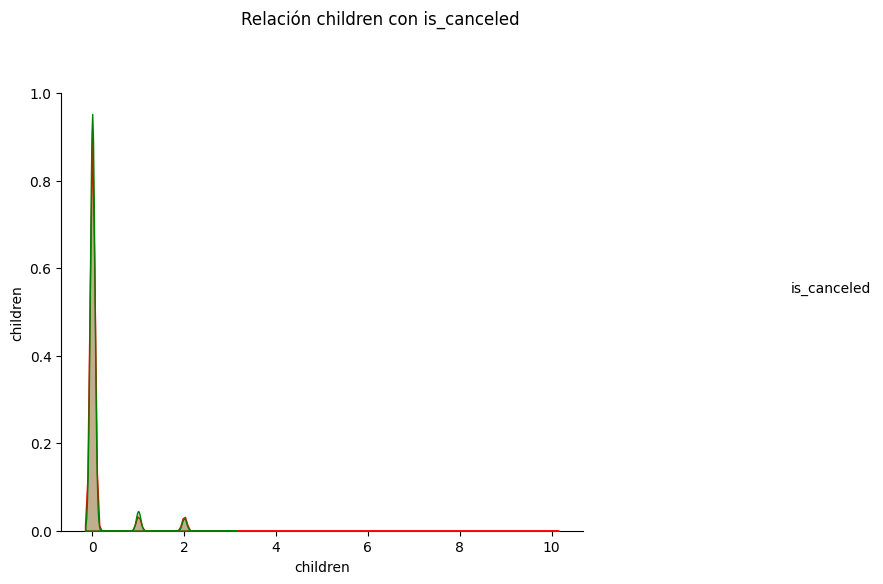

In [ ]:
columns=['children', 'is_canceled']
ds_pairplot=archivo_train[columns].copy()
graf_pairplot=sns.pairplot(data=ds_pairplot, hue="is_canceled", palette=["g", "r"])
graf_pairplot.fig.suptitle("Relación children con is_canceled", y=1.08)
graf_pairplot.fig.set_size_inches(10,6)

Pareciera haber una ligera diferencia entre la cantidad de no-cancelados y cancelados, pero no muy sustancial

####Variable babies

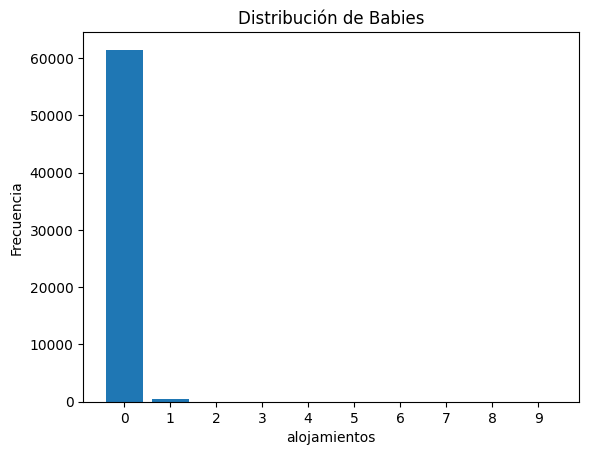

In [ ]:
ds_agrupado_babies=archivo_train.groupby(['babies']).count()

eje_x = ds_agrupado_babies.index.tolist()
eje_y = ds_agrupado_babies['hotel'].tolist()

plt.locator_params('x', nbins=12)
plt.bar(eje_x, eje_y)

plt.ylabel('Frecuencia')
plt.xlabel('alojamientos')
plt.title('Distribución de Babies')
 
plt.show()

Rara vez se aloja un bebé



Veo su relación con el target graficando su distribución con un gráfico de a pares contrastando con la variable is_canceled


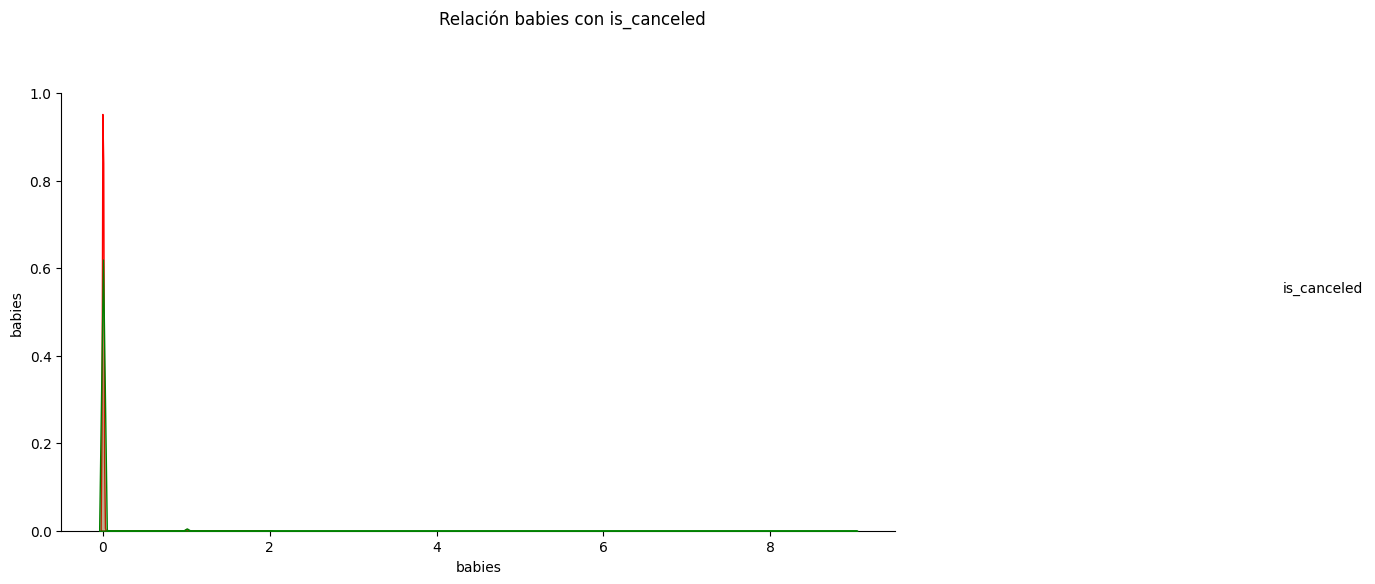

In [46]:
columns=['babies', 'is_canceled']
ds_pairplot=archivo_train[columns].copy()
graf_pairplot=sns.pairplot(data=ds_pairplot, hue="is_canceled", palette=["g", "r"])
graf_pairplot.fig.suptitle("Relación babies con is_canceled", y=1.08)

graf_pairplot.fig.set_size_inches(16,6)

Se ve que hay más cancelados cuando no hay bebes que cuando hay

####Variable booking_changes

Cuando no hay bebés hospedados suelen haber cancelado mucho mas

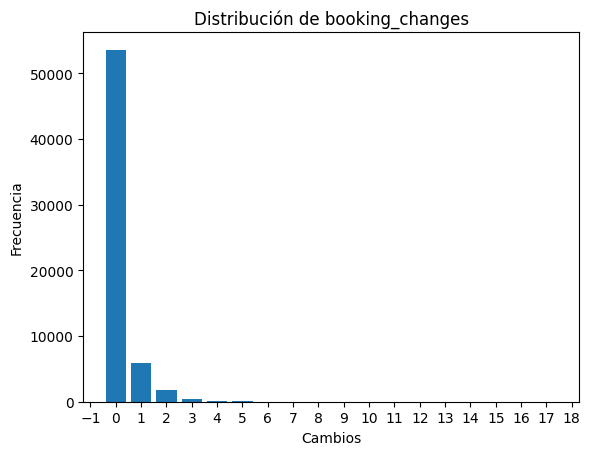

In [ ]:
ds_agrupado_booking_changes=archivo_train.groupby(['booking_changes']).count()

eje_x = ds_agrupado_booking_changes.index.tolist()
eje_y = ds_agrupado_booking_changes['hotel'].tolist()

plt.locator_params('x', nbins=20)
plt.bar(eje_x, eje_y)

plt.ylabel('Frecuencia')
plt.xlabel('Cambios')
plt.title('Distribución de booking_changes')
 
plt.show()

Los usuarios normalmente nunca cancelaron una reserva previa, pero si lo hicieron generalmente fué solo una vez




Veo su relación con el target graficando su distribución con un gráfico de a pares contrastando con la variable is_canceled

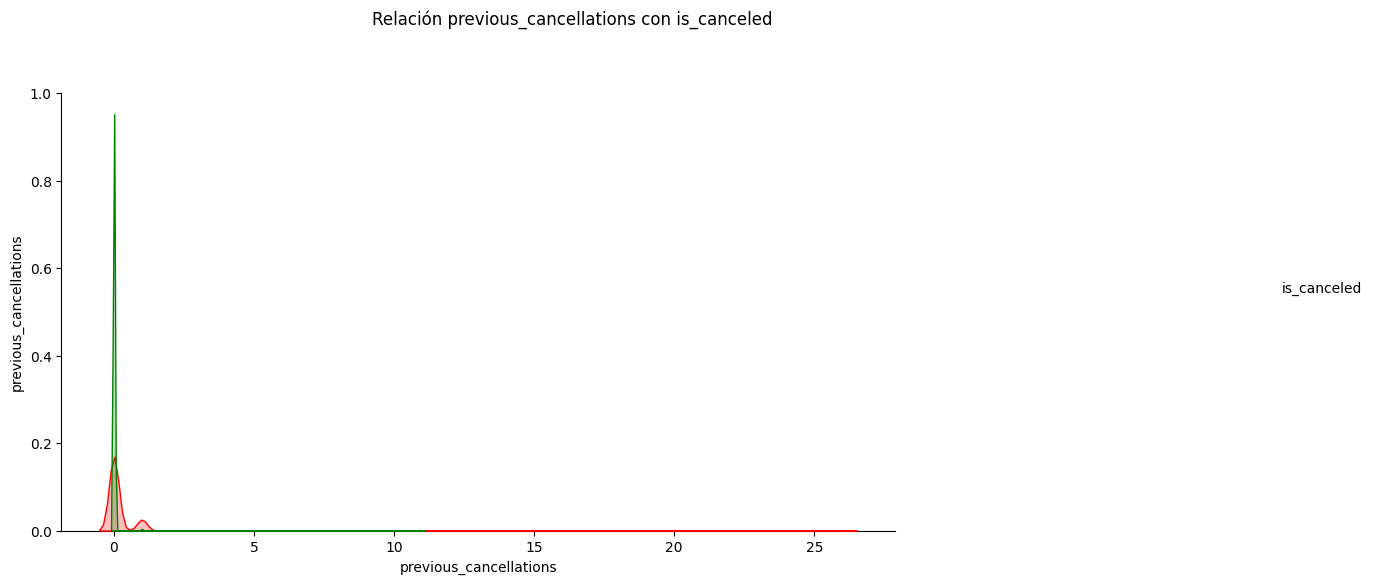

In [47]:
columns=['previous_cancellations', 'is_canceled']
ds_pairplot=archivo_train[columns].copy()
graf_pairplot=sns.pairplot(data=ds_pairplot, hue="is_canceled", palette=["g", "r"])
graf_pairplot.fig.suptitle("Relación previous_cancellations con is_canceled", y=1.08)
graf_pairplot.fig.set_size_inches(16,6)

Cuando no tienen cancelaciones previas la diferencia entre la cantidad de no cancelados y cancelados es muy grande a favor de no cancelado.

####Variable days_in_waiting_list

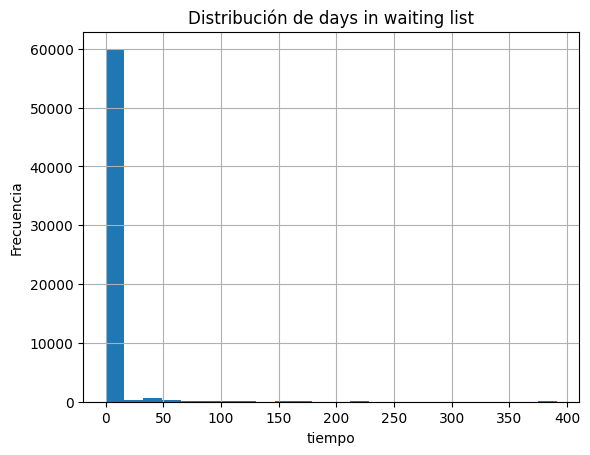

In [ ]:
plt.title('Distribución de days in waiting list')
plt.hist(archivo_train['days_in_waiting_list'], bins = 24 , alpha = 1)
plt.xlabel("tiempo")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

La mayoría no suele esperar




Veo su relación con el target graficando su distribución con un gráfico de a pares contrastando con la variable is_canceled

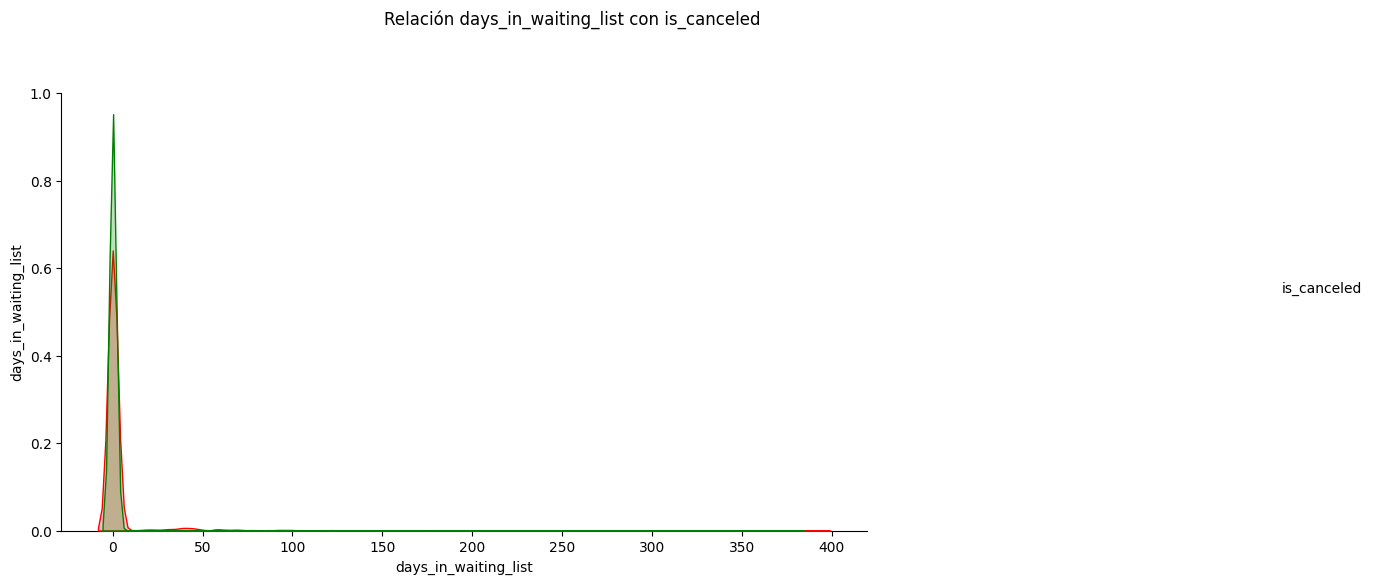

In [48]:
columns=['days_in_waiting_list', 'is_canceled']
ds_pairplot=archivo_train[columns].copy()
graf_pairplot=sns.pairplot(data=ds_pairplot, hue="is_canceled", palette=["g", "r"])
graf_pairplot.fig.suptitle("Relación days_in_waiting_list con is_canceled", y=1.08)
graf_pairplot.fig.set_size_inches(16,6)

Cuando no entraron en la lista de espera la gran mayoría no canceló

####Variable required_car_parking_spaces

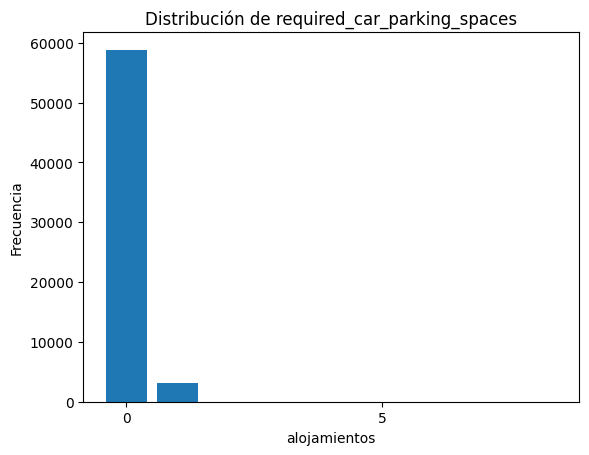

In [ ]:
ds_agrupado_siwn=archivo_train.groupby(['required_car_parking_spaces']).count()

eje_x = ds_agrupado_siwn.index.tolist()
eje_y = ds_agrupado_siwn['hotel'].tolist()

plt.locator_params('x', nbins=2)
plt.bar(eje_x, eje_y)

plt.ylabel('Frecuencia')
plt.xlabel('alojamientos')
plt.title('Distribución de required_car_parking_spaces')
 
plt.show()

No suelen ocupar estacionamiento y si lo hacen generalmente es solo un espacio



Veo su relación con el target graficando su distribución con un gráfico de a pares contrastando con la variable is_canceled


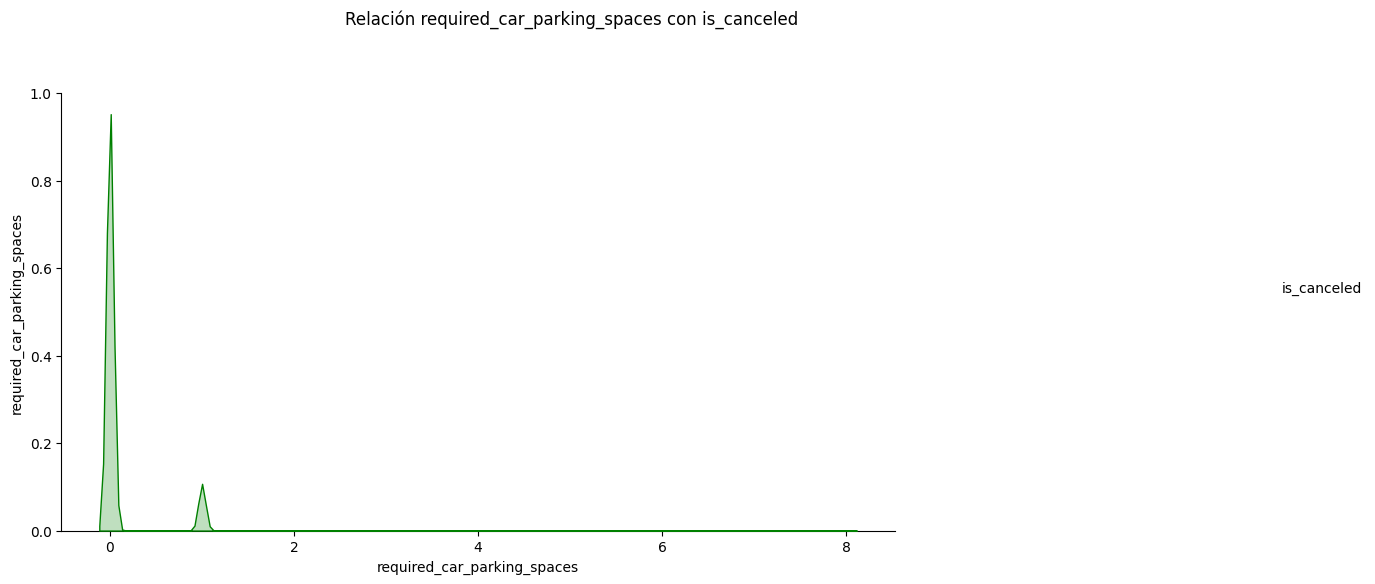

In [49]:
columns=['required_car_parking_spaces', 'is_canceled']
ds_pairplot=archivo_train[columns].copy()
graf_pairplot=sns.pairplot(data=ds_pairplot, hue="is_canceled", palette=["g", "r"])
graf_pairplot.fig.suptitle("Relación required_car_parking_spaces con is_canceled", y=1.08)
graf_pairplot.fig.set_size_inches(16,6)



Sale a la vista un posible error en los datos. Posiblemente cuando la variable required_car_parking_spaces se utiliza el campo is_canceled es ignorado


####Variable total_of_special_requests

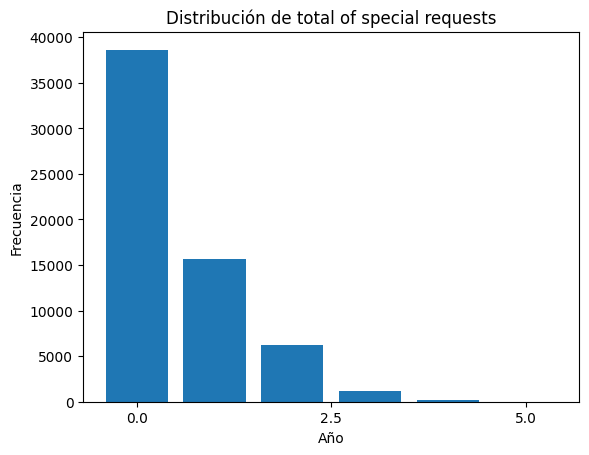

In [ ]:
ds_agrupado_ady=archivo_train.groupby(['total_of_special_requests']).count()

eje_x = [0, 1, 2,3,4,5]
eje_y = ds_agrupado_ady['hotel'].tolist()

plt.locator_params('x', nbins=3)
plt.bar(eje_x, eje_y)

plt.ylabel('Frecuencia')
plt.xlabel('Año')
plt.title('Distribución de total of special requests')
 
plt.show()

La mayoría no tiene pedidos especiales, luego cae la frecuencia linealmente hasta un numero de 5 pedidos




Veo su relación con el target graficando su distribución con un gráfico de a pares contrastando con la variable is_canceled

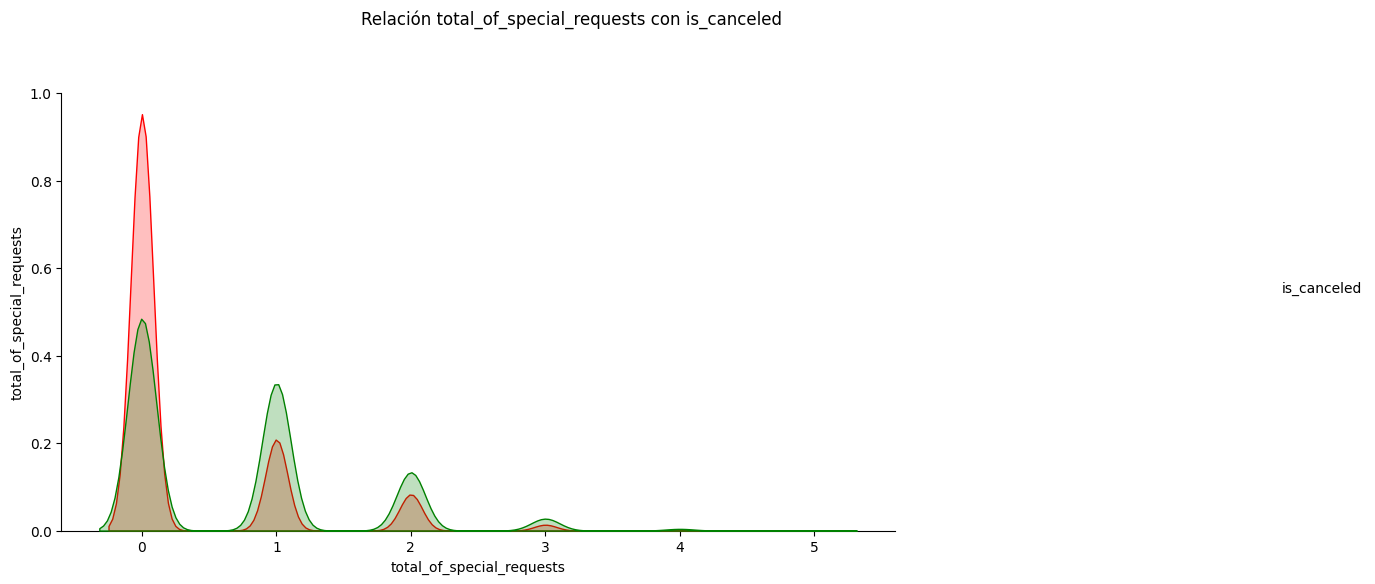

In [50]:
columns=['total_of_special_requests', 'is_canceled']
ds_pairplot=archivo_train[columns].copy()
graf_pairplot=sns.pairplot(data=ds_pairplot, hue="is_canceled", palette=["g", "r"])
graf_pairplot.fig.suptitle("Relación total_of_special_requests con is_canceled", y=1.08)
graf_pairplot.fig.set_size_inches(16,6)



Cuando no tuvieron ningún pedido especial la mayoría de los huespedes cancelaron (casi el doble)

Luego el ratio es positivo si hubieron pedidos especiales


####Variable previous_cancellations

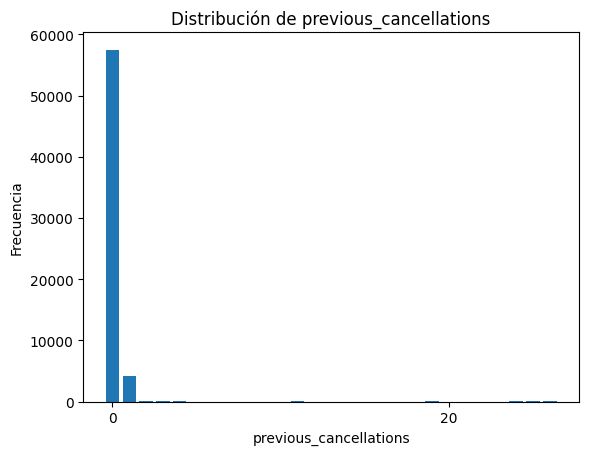

In [ ]:
ds_agrupado_siwn=archivo_train.groupby(['previous_cancellations']).count()

eje_x = ds_agrupado_siwn.index.tolist()
eje_y = ds_agrupado_siwn['hotel'].tolist()

plt.locator_params('x', nbins=2)
plt.bar(eje_x, eje_y)

plt.ylabel('Frecuencia')
plt.xlabel('previous_cancellations')
plt.title('Distribución de previous_cancellations')
 
plt.show()

Los usuarios normalmente nunca cancelaron una reserva previa, pero si lo hicieron generalmente fué solo una vez

Veo su relación con el target graficando su distribución con un gráfico de a pares contrastando con la variable is_canceled


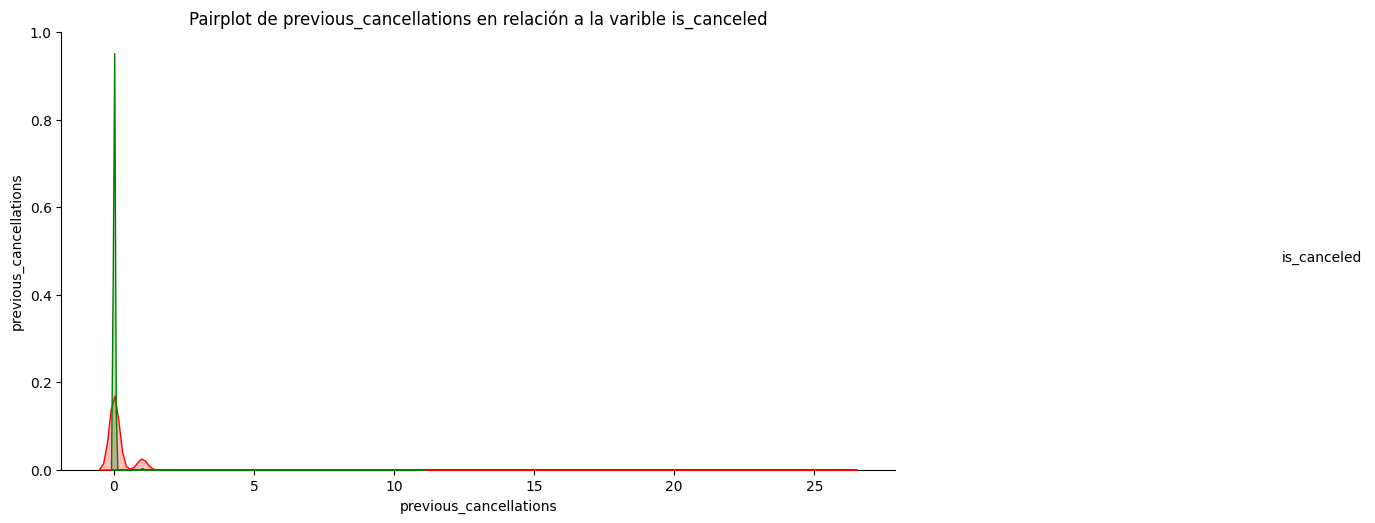

In [ ]:
columns=['previous_cancellations', 'is_canceled']
ds_pairplot=archivo_train[columns].copy()
graf_pairplot=sns.pairplot(data=ds_pairplot, hue="is_canceled", palette=["g", "r"]).set(title="Pairplot de previous_cancellations en relación a la varible is_canceled")
graf_pairplot.fig.set_size_inches(16,6)

Cuando no tienen cancelaciones previas la diferencia entre la cantidad de no cancelados y cancelados es muy grande a favor de no cancelado.

###Análisis inicial variables cuantitativas continuas

####Variable adr

In [ ]:
variables_cuantitativas_continuas.head()

,adr
0,115.5
1,42.0
2,229.0
3,75.0
4,75.0


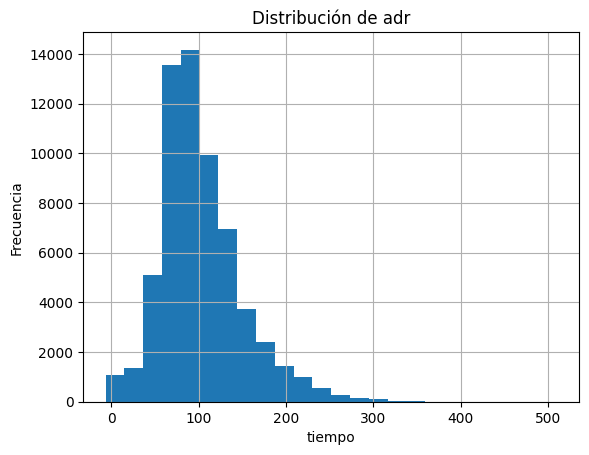

In [ ]:
plt.title('Distribución de adr')
plt.hist(archivo_train['adr'], bins = 24 , alpha = 1)
plt.xlabel("tiempo")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

La mayoría de los huespedes pagan una tarifa diaria de entre 50-150




Veo su relación con el target graficando su distribución con un gráfico de a pares contrastando con la variable is_canceled

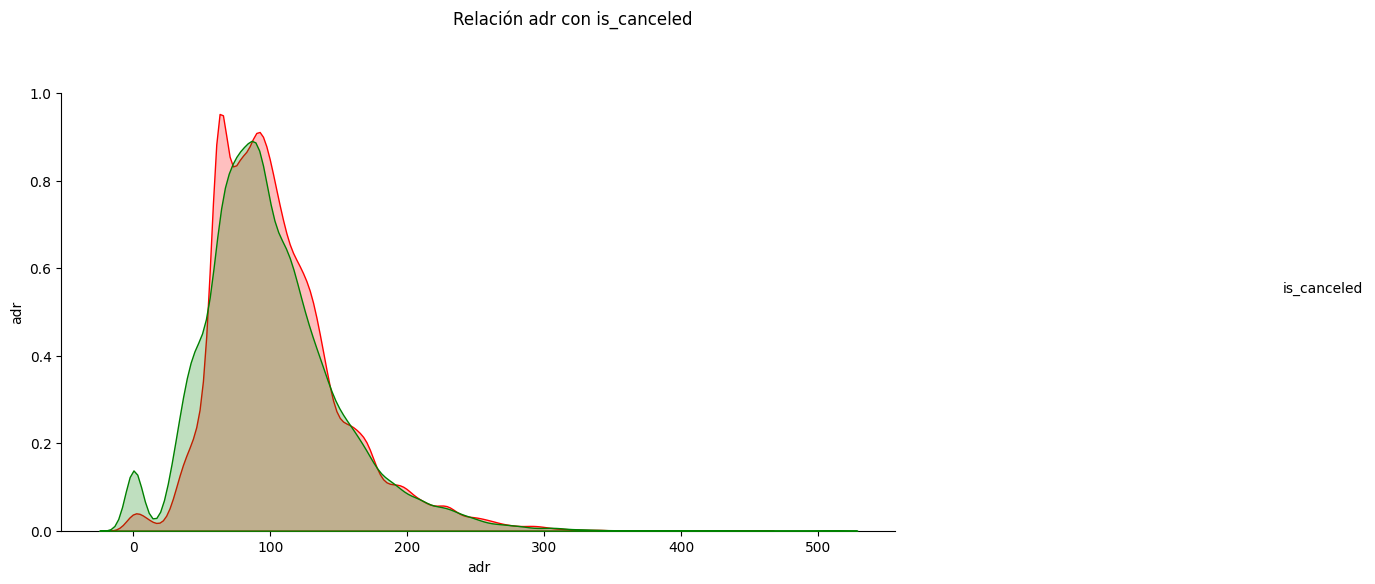

In [51]:
columns=['adr', 'is_canceled']
ds_pairplot=archivo_train[columns].copy()
graf_pairplot=sns.pairplot(data=ds_pairplot, hue="is_canceled", palette=["g", "r"])
graf_pairplot.fig.suptitle("Relación adr con is_canceled", y=1.08)
graf_pairplot.fig.set_size_inches(16,6)

En un primer intervalo puede apreciarse que los no-cancelados superan a los cancelados. Esto puede deberse a que como fué un buen precio hicieron un esfuerzo extra. Luego el ratio se empareja y es muy similar en ambos casos

###Análisis inicial variables cuasicuantitativas

In [ ]:
variables_cuasicuantitativas.head()

,arrival_date_month,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,required_car_parking_spaces,reservation_status_date
0,September,0,0,0,D,D,0,2016-08-25
1,October,0,0,0,A,A,1,2015-11-01
2,October,0,0,0,F,F,0,2016-10-14
3,December,0,0,0,A,A,0,2016-11-29
4,March,0,0,0,A,A,0,2017-03-26


####Variable arrival_date_month

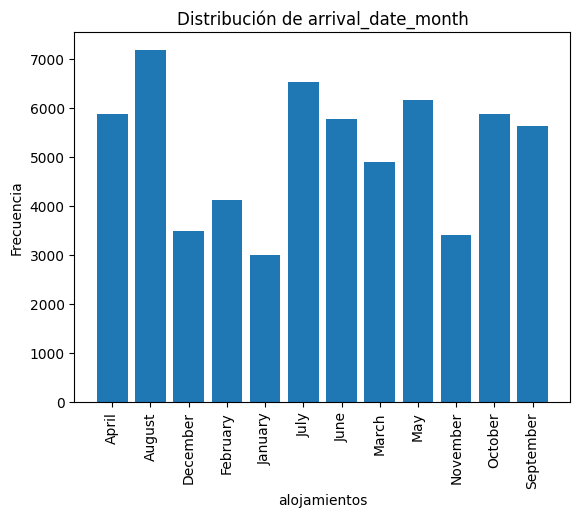

In [ ]:
ds_agrupado_siwn=archivo_train.groupby(['arrival_date_month']).count()

eje_x = ds_agrupado_siwn.index.tolist()
eje_y = ds_agrupado_siwn['hotel'].tolist()

plt.locator_params('x', nbins=2)
plt.bar(eje_x, eje_y)

plt.ylabel('Frecuencia')
plt.xlabel('alojamientos')
plt.title('Distribución de arrival_date_month')
plt.xticks(rotation=90)
plt.show()

Se ve que es bastante parejo la frecuencia de huéspedes por meses, se puede ver que en enero hay menos huéspedes y que en agosto es el máximo.

####Variable agent

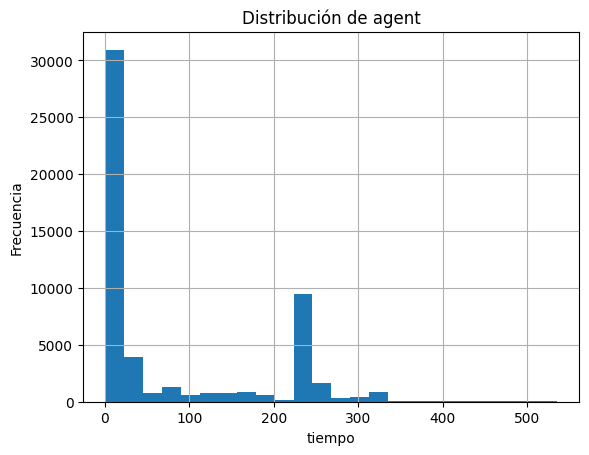

In [ ]:
plt.title('Distribución de agent')
plt.hist(archivo_train['agent'], bins = 24 , alpha = 1)
plt.xlabel("tiempo")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

Veo su relación con el target graficando su distribución con un gráfico de a pares contrastando con la variable is_canceled

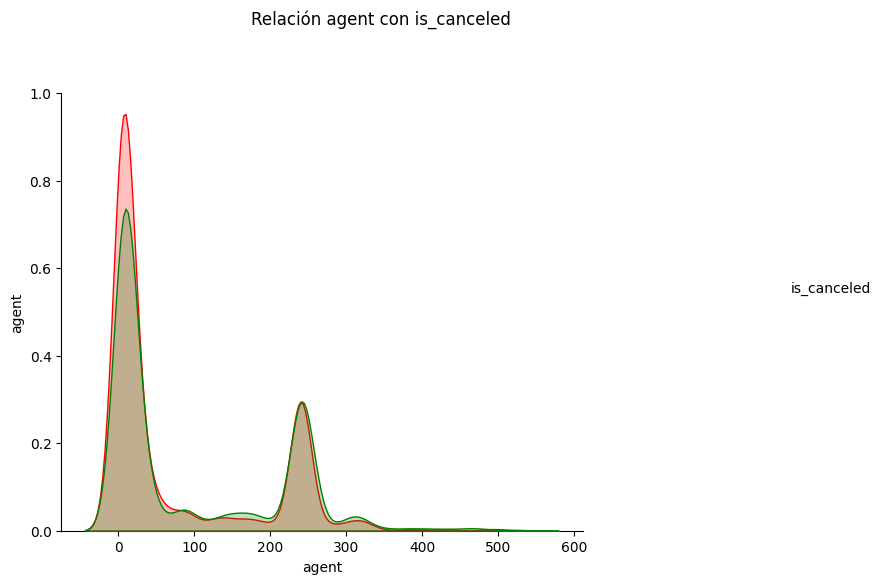

In [52]:
columns=['agent', 'is_canceled']
ds_pairplot=archivo_train[columns].copy()
graf_pairplot=sns.pairplot(data=ds_pairplot, hue="is_canceled", palette=["g", "r"])
graf_pairplot.fig.suptitle("Relación agent con is_canceled", y=1.08)
graf_pairplot.fig.set_size_inches(10,6)

Es dificil sacar una conclusión a partir del gráfico ya que no es una variable cuantitativa. Pero se puede apreciar un acumulamiento a izquierda de casos de cancelación

####Variable company

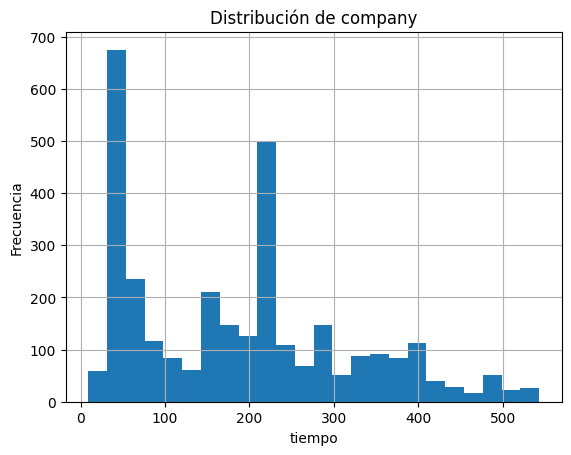

In [ ]:
plt.title('Distribución de company')
plt.hist(archivo_train['company'], bins = 24 , alpha = 1)
plt.xlabel("tiempo")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

Veo su relación con el target graficando su distribución con un gráfico de a pares contrastando con la variable is_canceled

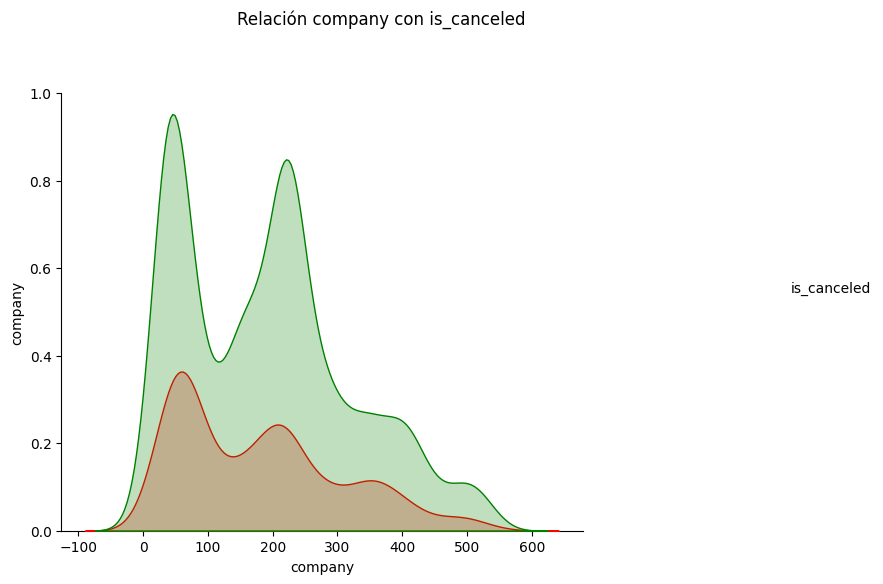

In [53]:
columns=['company', 'is_canceled']
ds_pairplot=archivo_train[columns].copy()
graf_pairplot=sns.pairplot(data=ds_pairplot, hue="is_canceled", palette=["g", "r"])
graf_pairplot.fig.suptitle("Relación company con is_canceled", y=1.08)
graf_pairplot.fig.set_size_inches(10,6)

####Variable is_repeated_guest

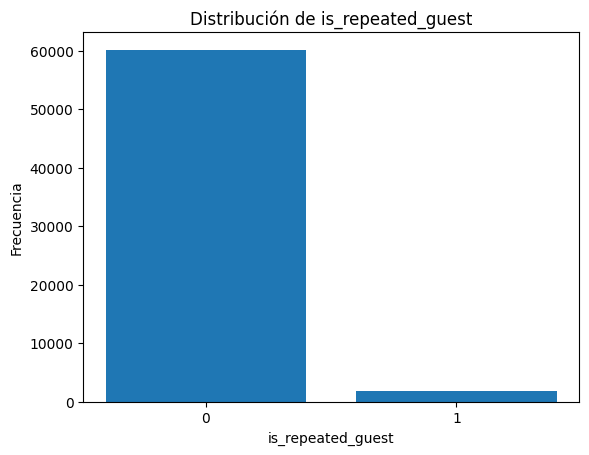

In [ ]:
ds_agrupado_siwn=archivo_train.groupby(['is_repeated_guest']).count()

eje_x = ds_agrupado_siwn.index.tolist()
eje_y = ds_agrupado_siwn['hotel'].tolist()

plt.locator_params('x', nbins=2)
plt.bar(eje_x, eje_y)

plt.ylabel('Frecuencia')
plt.xlabel('is_repeated_guest')
plt.title('Distribución de is_repeated_guest')
 
plt.show()

Se puede ver que la gran mayoría de huéspedes no son repetidos

Veo su relación con el target graficando su distribución con un gráfico de a pares contrastando con la variable is_canceled

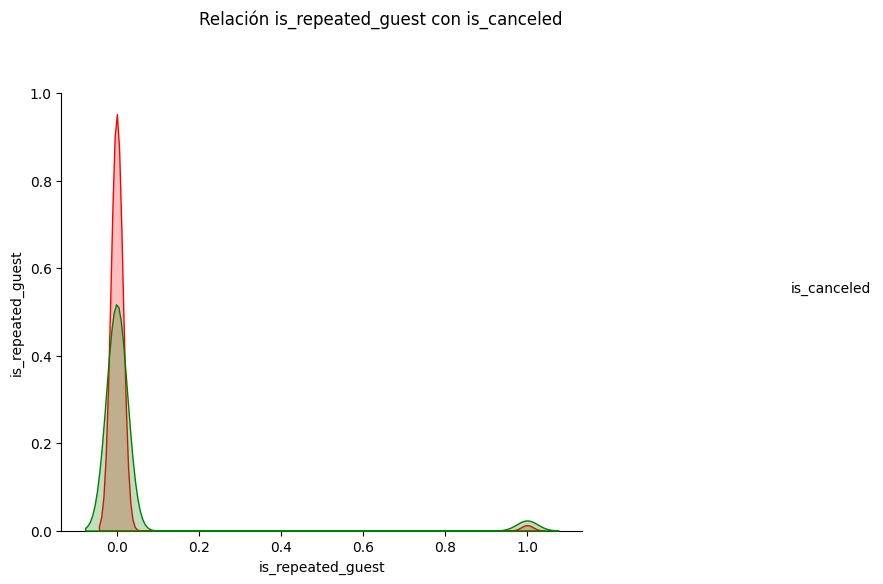

In [ ]:
columns=['is_repeated_guest', 'is_canceled']
ds_pairplot=archivo_train[columns].copy()
graf_pairplot=sns.pairplot(data=ds_pairplot, hue="is_canceled", palette=["g", "r"])
graf_pairplot.fig.suptitle("Relación is_repeated_guest con is_canceled", y=1.08)
graf_pairplot.fig.set_size_inches(10,6)

Casi el doble de los huespedes nuevos cancelaron.

Por el contrario, los huespedes repetidos generalmente no cancelaron


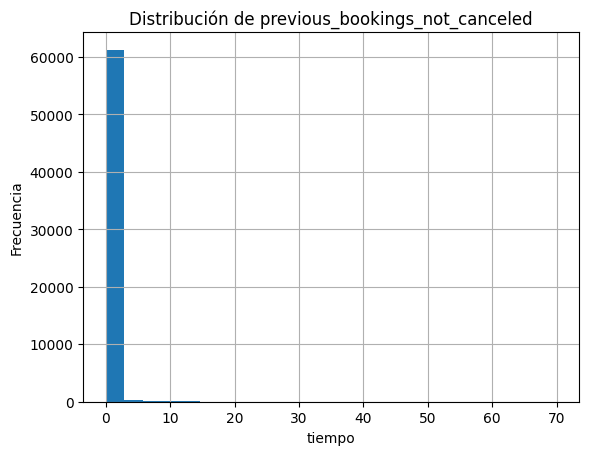

In [ ]:

plt.title('Distribución de previous_bookings_not_canceled')
plt.hist(archivo_train['previous_bookings_not_canceled'], bins = 24 , alpha = 1)
plt.xlabel("tiempo")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

Casi todos huéspedes que hacen reservas no tuvieron reservas previas canceladas

Veo su relación con el target graficando su distribución con un gráfico de a pares contrastando con la variable is_canceled

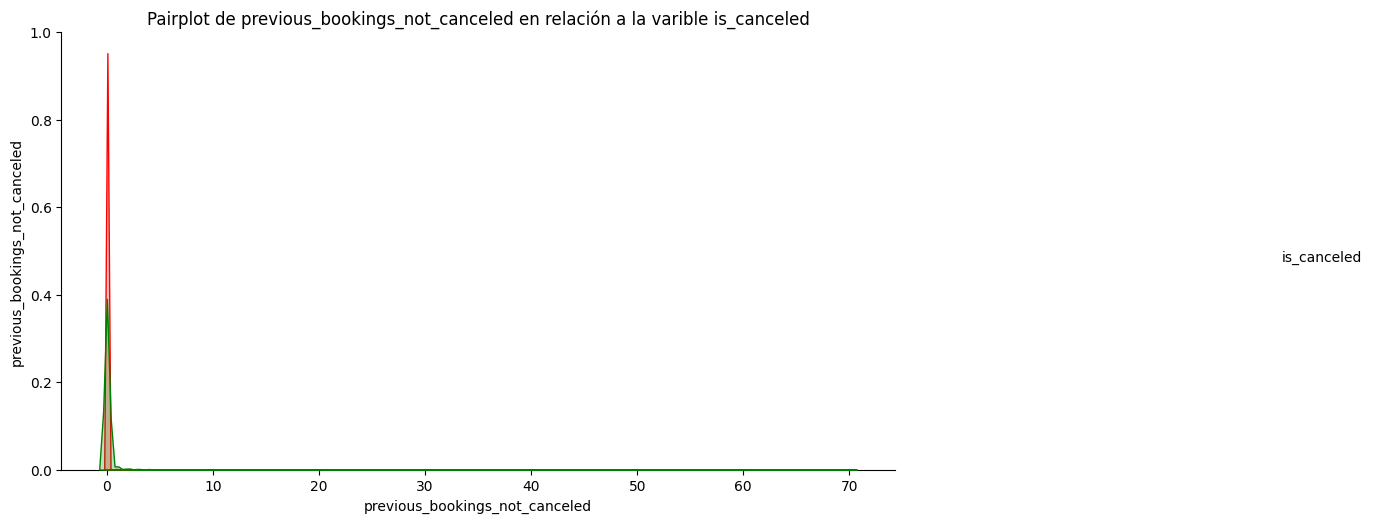

In [ ]:
columns=['previous_bookings_not_canceled', 'is_canceled']
ds_pairplot=archivo_train[columns].copy()
graf_pairplot=sns.pairplot(data=ds_pairplot, hue="is_canceled", palette=["g", "r"]).set(title="Pairplot de previous_bookings_not_canceled en relación a la varible is_canceled")
graf_pairplot.fig.set_size_inches(16,6)

La gran mayoría que no tenía reservas previas no canceladas han cancelado

####Variable reserved_room_type

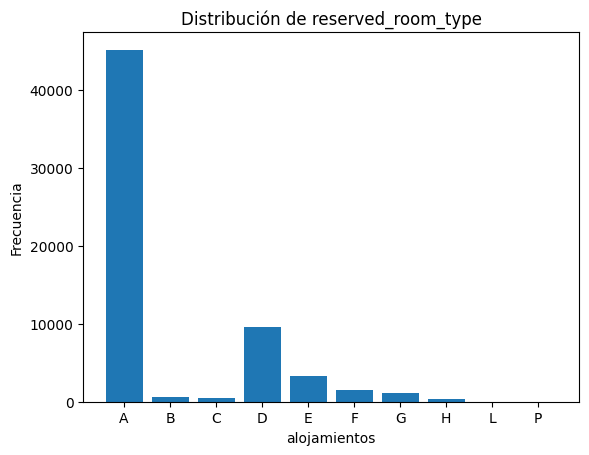

In [ ]:
ds_agrupado_siwn=archivo_train.groupby(['reserved_room_type']).count()

eje_x = ds_agrupado_siwn.index.tolist()
eje_y = ds_agrupado_siwn['hotel'].tolist()

plt.locator_params('x', nbins=2)
plt.bar(eje_x, eje_y)

plt.ylabel('Frecuencia')
plt.xlabel('reserved_room_type')
plt.title('Distribución de reserved_room_type')
 
plt.show()

La gran mayoría de los huéspedes reservan la habitación de tipo A.

####Variable assigned_room_type

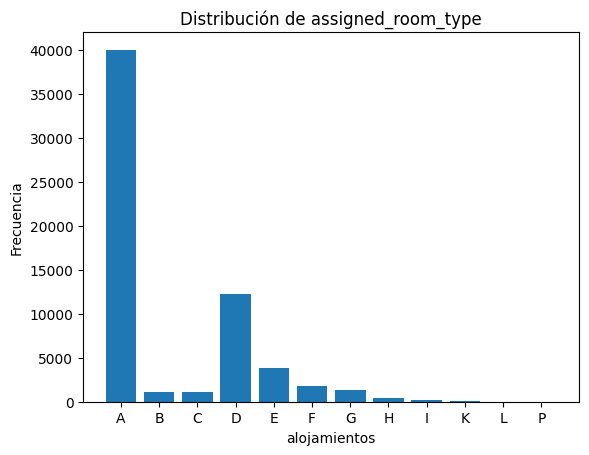

In [ ]:
ds_agrupado_siwn=archivo_train.groupby(['assigned_room_type']).count()

eje_x = ds_agrupado_siwn.index.tolist()
eje_y = ds_agrupado_siwn['hotel'].tolist()

plt.locator_params('x', nbins=2)
plt.bar(eje_x, eje_y)

plt.ylabel('Frecuencia')
plt.xlabel('assigned_room_type')
plt.title('Distribución de assigned_room_type')
 
plt.show()

La gran mayoría delas habitaciones que se asignan son de tipo A

####Variable required_car_parking_spaces

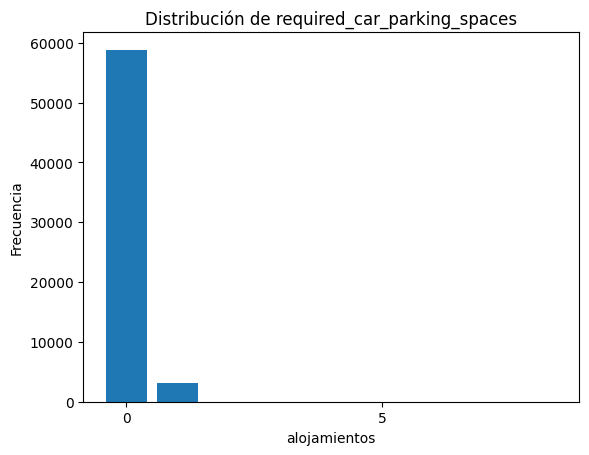

In [ ]:
ds_agrupado_siwn=archivo_train.groupby(['required_car_parking_spaces']).count()

eje_x = ds_agrupado_siwn.index.tolist()
eje_y = ds_agrupado_siwn['hotel'].tolist()

plt.locator_params('x', nbins=2)
plt.bar(eje_x, eje_y)

plt.ylabel('Frecuencia')
plt.xlabel('required_car_parking_spaces')
plt.title('Distribución de required_car_parking_spaces')
 
plt.show()

Casi todos los huéspedes no solicitan espacio para guardar su auto

###Análisis inicial variables cualitativas

In [ ]:
variables_cualitativas.head()

,hotel,arrival_date_year,meal,country,market_segment,distribution_channel,deposit_type,customer_type,reservation_status,id
0,City Hotel,2016,BB,USA,Online TA,TA/TO,No Deposit,Transient,Canceled,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689
1,Resort Hotel,2015,BB,PRT,Groups,Direct,No Deposit,Transient,Check-Out,b1428f80-c56c-4ae4-91a9-6962edae08b1
2,City Hotel,2016,BB,CHE,Online TA,TA/TO,No Deposit,Transient,Check-Out,2226c018-ea20-4c4e-8f71-ea66aee70d7c
3,City Hotel,2016,BB,PRT,Groups,TA/TO,Non Refund,Transient,Canceled,314f56dc-2e4d-4298-9bdd-27bb008bffff
4,City Hotel,2017,BB,FRA,Offline TA/TO,TA/TO,No Deposit,Transient-Party,Check-Out,28c75445-c603-413a-babf-ad377018b592


####Variable hotel

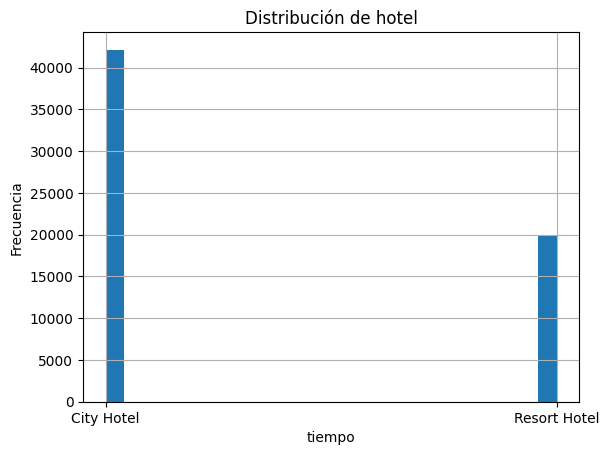

In [ ]:
plt.title('Distribución de hotel')
plt.hist(archivo_train['hotel'], bins = 24 , alpha = 1)
plt.xlabel("hotel")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

Los huespedes realizan más reservas al hotel City Hotel que al Resort Hotel

Se puede observar que hay más huespedes en el Resort Hotel que en el City Hotel

####Variable meal

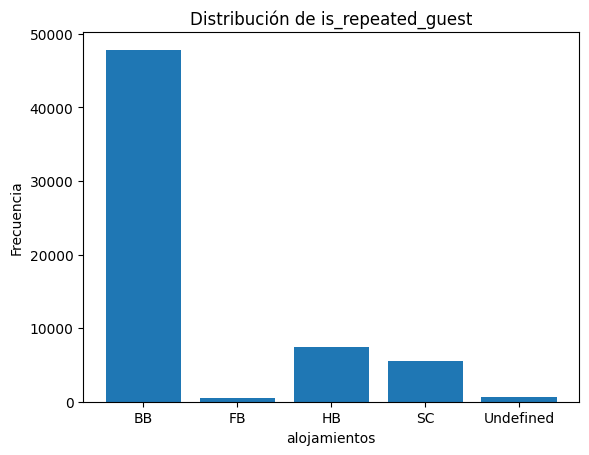

In [ ]:
ds_agrupado_siwn=archivo_train.groupby(['meal']).count()

eje_x = ds_agrupado_siwn.index.tolist()
eje_y = ds_agrupado_siwn['hotel'].tolist()

plt.locator_params('x', nbins=2)
plt.bar(eje_x, eje_y)

plt.ylabel('Frecuencia')
plt.xlabel('meal')
plt.title('Distribución de meal')
 
plt.show()

Casi todos los huéspedes solicitan la comida de tipo BB

Se puede observar que lo que más eligen los huéspedes es la opción de BB y la que menos se elige es la opción de FB

####Variable market_segment

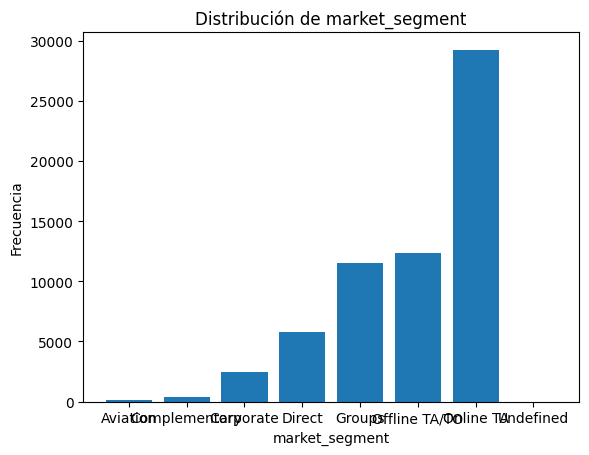

In [ ]:
ds_agrupado_siwn=archivo_train.groupby(['market_segment']).count()

eje_x = ds_agrupado_siwn.index.tolist()
eje_y = ds_agrupado_siwn['hotel'].tolist()

plt.locator_params('x', nbins=2)
plt.bar(eje_x, eje_y)

plt.ylabel('Frecuencia')
plt.xlabel('market_segment')
plt.title('Distribución de market_segment')
 
plt.show()

Lo que más se elige es la opción de Online TA,  luego la Offline TA y después Groups.

####Variable distribution_channel

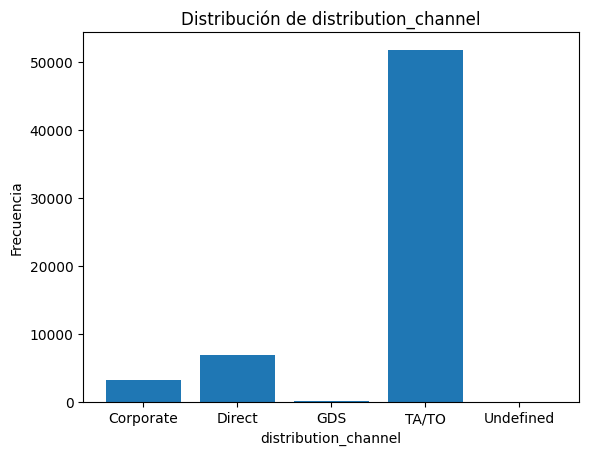

In [ ]:
ds_agrupado_siwn=archivo_train.groupby(['distribution_channel']).count()

eje_x = ds_agrupado_siwn.index.tolist()
eje_y = ds_agrupado_siwn['hotel'].tolist()

plt.locator_params('x', nbins=2)
plt.bar(eje_x, eje_y)

plt.ylabel('Frecuencia')
plt.xlabel('distribution_channel')
plt.title('Distribución de distribution_channel')
 
plt.show()

La gran mayoría son del tipo TA/TO

Aquí se puede ver que las reservas las hacen en su mayoría TA/TO

####Variable deposit_type

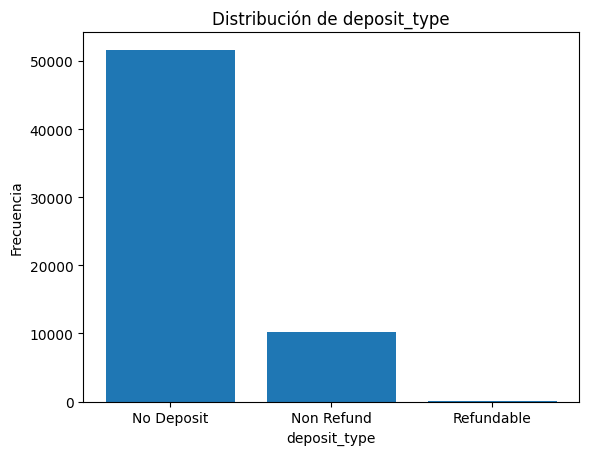

In [ ]:
ds_agrupado_siwn=archivo_train.groupby(['deposit_type']).count()

eje_x = ds_agrupado_siwn.index.tolist()
eje_y = ds_agrupado_siwn['hotel'].tolist()

plt.locator_params('x', nbins=2)
plt.bar(eje_x, eje_y)

plt.ylabel('Frecuencia')
plt.xlabel('deposit_type')
plt.title('Distribución de deposit_type')
 
plt.show()

La gran mayoría de los clientes no realizan depósitos

####Variable customer_type

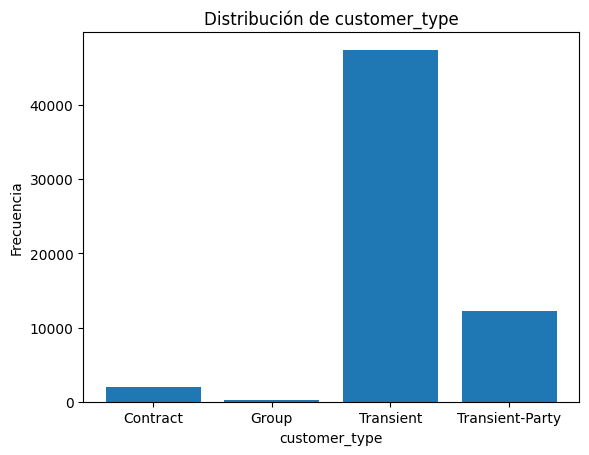

In [ ]:
ds_agrupado_siwn=archivo_train.groupby(['customer_type']).count()

eje_x = ds_agrupado_siwn.index.tolist()
eje_y = ds_agrupado_siwn['hotel'].tolist()

plt.locator_params('x', nbins=2)
plt.bar(eje_x, eje_y)

plt.ylabel('Frecuencia')
plt.xlabel('customer_type')
plt.title('Distribución de customer_type')
 
plt.show()

La gran mayoría de las reservas están asociadas al tipo transient

Acá se puede ver que el tipo de reserva para Transient es el que se da con bastante mayor frecuencia.

####Variable reservation_status

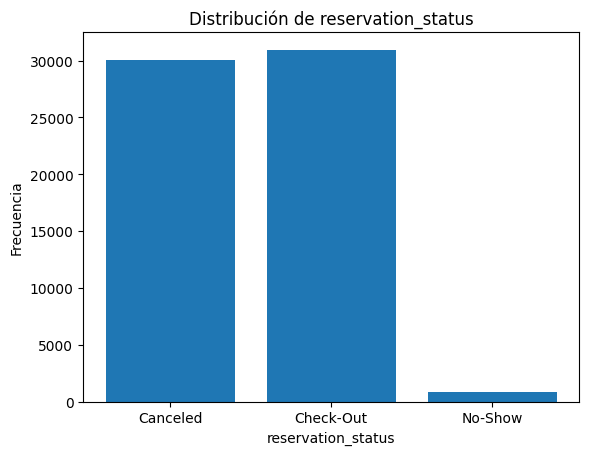

In [ ]:
ds_agrupado_siwn=archivo_train.groupby(['reservation_status']).count()

eje_x = ds_agrupado_siwn.index.tolist()
eje_y = ds_agrupado_siwn['hotel'].tolist()

plt.locator_params('x', nbins=2)
plt.bar(eje_x, eje_y)

plt.ylabel('Frecuencia')
plt.xlabel('reservation_status')
plt.title('Distribución de reservation_status')
 
plt.show()

Gracias a este gráfico se puede ver que hay menor grado de cancelación que de casos confirmados

##Variables cuantitativas

En primer lugar, generamos estadísticas descriptivas para las columnas cuantitativas discretas(medidas de resumen).

In [ ]:
variables_cuantitativas_discretas.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,booking_changes,agent,company,days_in_waiting_list,total_of_special_requests
count,61913.000000,61913.000000,61913.00000,61913.000000,61913.000000,61913.000000,61913.000000,61909.000000,61913.000000,61913.000000,54023.000000,3152.000000,61913.000000,61913.000000
mean,112.248187,2016.154749,27.21808,15.785812,0.924135,2.510054,1.862791,0.104896,0.007155,0.195952,84.541010,188.539340,2.638977,0.523703
std,110.717953,0.708389,13.52601,8.795489,0.993101,1.884926,0.589066,0.402847,0.092158,0.610519,109.523772,129.457025,18.619092,0.775412
min,0.000000,2015.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,0.000000,0.000000
25%,23.000000,2016.000000,16.00000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,9.000000,67.000000,0.000000,0.000000
50%,78.000000,2016.000000,28.00000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,12.000000,179.000000,0.000000,0.000000
75%,172.000000,2017.000000,38.00000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,208.000000,270.000000,0.000000,1.000000
max,629.000000,2017.000000,53.00000,31.000000,16.000000,40.000000,55.000000,10.000000,9.000000,17.000000,535.000000,543.000000,391.000000,5.000000


Ahora mostraremos la media, mediana y moda de cada columna

In [ ]:
for indice in columnas_cuantitativas_discretas:
  lead_time_media = archivo_train[indice].mean()
  lead_time_mediana = archivo_train[indice].median()
  lead_time_moda = archivo_train[indice].mode()
  print("La media de la variable {0} es {1} ".format(indice,lead_time_media))
  print("La mediana de la variable {0} es {1}".format(indice,lead_time_mediana))
  print("La moda de la variable {0} es {1}\n".format(indice,lead_time_moda))

La media de la variable lead_time es 112.24818697204141 
La mediana de la variable lead_time es 78.0
La moda de la variable lead_time es 0    0
Name: lead_time, dtype: int64

La media de la variable arrival_date_year es 2016.1547494064253 
La mediana de la variable arrival_date_year es 2016.0
La moda de la variable arrival_date_year es 0    2016
Name: arrival_date_year, dtype: int64

La media de la variable arrival_date_week_number es 27.21808020932599 
La mediana de la variable arrival_date_week_number es 28.0
La moda de la variable arrival_date_week_number es 0    33
Name: arrival_date_week_number, dtype: int64

La media de la variable arrival_date_day_of_month es 15.785812349587324 
La mediana de la variable arrival_date_day_of_month es 16.0
La moda de la variable arrival_date_day_of_month es 0    17
Name: arrival_date_day_of_month, dtype: int64

La media de la variable stays_in_weekend_nights es 0.9241354804322194 
La mediana de la variable stays_in_weekend_nights es 1.0
La moda de

Ahora mostraremos la media, la mediana y la moda de la variable cuantitativa continua

In [ ]:
for indice in columnas_cuantitativas_continuas:
  lead_time_media = archivo_train[indice].mean()
  lead_time_mediana = archivo_train[indice].median()
  lead_time_moda = archivo_train[indice].mode()
  print("La media de la variable {0} es {1} ".format(indice,lead_time_media))
  print("La mediana de la variable {0} es {1}".format(indice,lead_time_mediana))
  print("La moda de la variable {0} es {1}\n".format(indice,lead_time_moda))

La media de la variable adr es 102.38377303635745 
La mediana de la variable adr es 95.0
La moda de la variable adr es 0    62.0
Name: adr, dtype: float64



##Variables cualitativas

Analizamos la cantidad de valores posibles de cada columna

In [ ]:
variables_cualitativas.nunique()

hotel                       2
arrival_date_year           3
meal                        5
country                   149
market_segment              8
distribution_channel        5
deposit_type                3
customer_type               4
reservation_status          3
id                      61913
dtype: int64

Ahora indicaremos cuantas veces aparece cada posible caso de cada columna

In [ ]:
for indice in columnas_cualitativas:
  hotel_valores = archivo_train[indice].value_counts()
  print("\nDel tipo: ",indice)
  print("Aparecen: \n",hotel_valores)


Del tipo:  hotel
Aparecen: 
 City Hotel      42129
Resort Hotel    19784
Name: hotel, dtype: int64 veces

Del tipo:  arrival_date_year
Aparecen: 
 2016    29362
2017    21066
2015    11485
Name: arrival_date_year, dtype: int64 veces

Del tipo:  meal
Aparecen: 
 BB           47837
HB            7452
SC            5556
Undefined      591
FB             477
Name: meal, dtype: int64 veces

Del tipo:  country
Aparecen: 
 PRT    27950
GBR     5733
FRA     4809
ESP     4210
DEU     3312
       ...  
HND        1
FJI        1
LIE        1
ATA        1
RWA        1
Name: country, Length: 149, dtype: int64 veces

Del tipo:  market_segment
Aparecen: 
 Online TA        29269
Offline TA/TO    12384
Groups           11545
Direct            5757
Corporate         2484
Complementary      359
Aviation           113
Undefined            2
Name: market_segment, dtype: int64 veces

Del tipo:  distribution_channel
Aparecen: 
 TA/TO        51849
Direct        6799
Corporate     3172
GDS             89
Unde

##Variables cuasicuantitativas

Ahora mostraremos la cantidad de valores posibles hay para cada columna de las variables cuasicuantitativas

In [ ]:
variables_cuasicuantitativas.nunique()

arrival_date_month                 12
is_repeated_guest                   2
previous_cancellations             15
previous_bookings_not_canceled     51
reserved_room_type                 10
assigned_room_type                 12
required_car_parking_spaces         5
reservation_status_date           915
dtype: int64

Ahora indicaremos cuantas veces aparece cada posible caso de cada columna

In [39]:
for indice in columnas_cuasicuantitativas:
  hotel_valores = archivo_train[indice].value_counts()
  print("\nDel tipo: ",indice)
  print("Aparecen: \n",hotel_valores)


Del tipo:  arrival_date_month
Aparecen: 
 August       7176
July         6524
May          6159
April        5878
October      5863
June         5772
September    5619
March        4899
February     4125
December     3493
November     3404
January      3001
Name: arrival_date_month, dtype: int64

Del tipo:  is_repeated_guest
Aparecen: 
 0    60180
1     1733
Name: is_repeated_guest, dtype: int64

Del tipo:  previous_cancellations
Aparecen: 
 0     57519
1      4137
2        61
24       36
3        34
26       20
19       17
4        16
25       16
11       15
14       12
6        12
5         9
13        8
21        1
Name: previous_cancellations, dtype: int64

Del tipo:  previous_bookings_not_canceled
Aparecen: 
 0     60375
1       631
2       258
3       151
4       103
5        79
6        44
8        29
7        29
10       24
9        23
11       21
13       19
12       14
14       12
25       10
15        9
17        8
18        7
24        6
20        5
22        5
26        5

## Variables irrelevantes

In [ ]:
id_valores = archivo_train["id"].value_counts()
print("Los posibles valores y la frecuencia con la que aparecen son \n",id_valores)

Los posibles valores y la frecuencia con la que aparecen son 
 7aa4cc6b-b92c-4061-b21d-4f9e0cac4689    1
4782fe38-2edf-48df-8a73-ff1df6150941    1
63068df5-6476-4d01-aa22-940eda3382eb    1
b442e553-c108-440f-8bf4-3a79d45e716c    1
c8e19318-10f5-4f61-a637-99ee6ae623c3    1
                                       ..
136f0dc4-424c-446d-9cf7-229ce4efbf0b    1
4dda8d58-4dbb-4bcf-9805-089a77c67553    1
2874695d-1cd4-4087-97e5-f235366fa774    1
2647c330-f992-4367-a655-670c8af94c65    1
7137e599-4442-41fb-b147-4aba9f344e38    1
Name: id, Length: 61913, dtype: int64


La variable ID es la que aporta un token único identificador para cada entrada por lo tanto esta si está fuera del scope de la investigación

Al entender el significado y naturaleza de cada variable observada se llega a la conclusión de que, a priori, resulta imposible afirmar que alguna de ellas sea irrelevante para el análisis. Ya que todas brindan información estrictamente ligada al problema y aparentan tener alguna relación con el target.


##Correlación entre variables

Para medir el nivel de correlación entre las variables utilizo el Coeficiente de Correlación de Pearson y lo muestro a través de un heatmap

<Axes: >

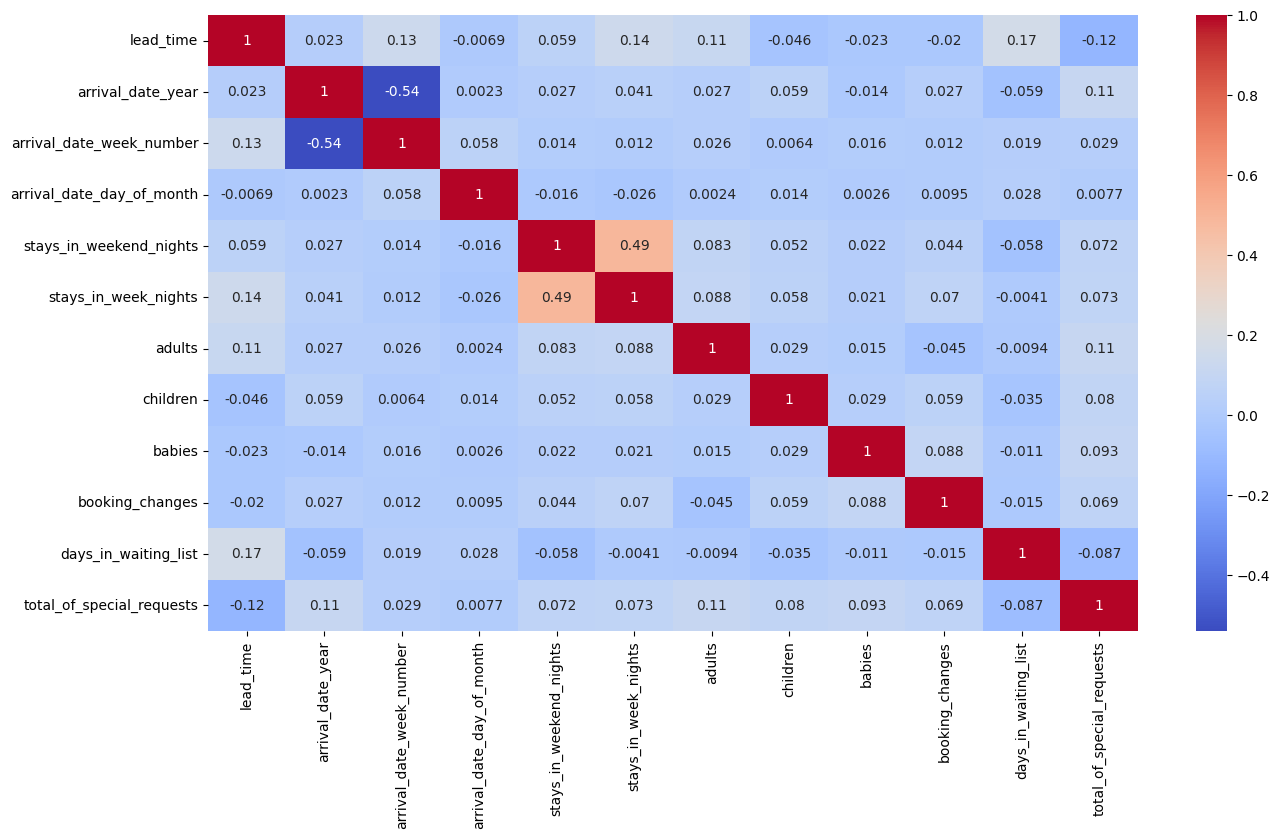

In [ ]:
matriz_correlaciones_discretas = variables_cuantitativas_discretas.corr()
plt.figure(figsize = (15,8))
sns.heatmap(matriz_correlaciones_discretas, annot = True, cmap='coolwarm')


Al observar el heatmap se puede ver que no existen muchas correlaciones fuertes entre variables. Las mas destacadas son:

 Arrival_date_year guarda una correlación negativa con Arrival_date_week_number
*   Stays_in_weekend_nights correlación positiva con Stays_in_week_nights
*   Children correlacion positiva con adr
*   Is_repeated_guest correlación positiva con Previous_bookings_not_canceled


Muchas de las correlaciones pueden verse afectadas por los datos faltantes o valores atípicos, pero como primera exploración resulta útil. Como por ejemplo en la columna de la variable company hay demasiadas columnas con valores nulos, es por eso que esa relación está muy afectada, y no es un relación real


##Relación con el target

Además del análisis gráfico en donde estudiamos la relación de las distribuciones de cada variable con el target. Incluimos un listado de las variables fuertemente relacionadas y por qué creemos que se da esa relación: 

*   **Variables cuantitativas discretas**:

    *   **Lead_time**: Si un cliente espera excesivo tiempo seguramente se harte y cancele la reserva
    *   **Arrival_date_week_number**: Vemos que hay intervalos dónde hay diferentes tendencias con el target pero a simple vista no pareciera establecerse una cuasalidad. 
    *   **adults | babies**: Ambos gráficos en relación con el target parecen indicar algunas tendencias, sin embargo la presencia de outliners no permiten apreciarlos con claridad.
    *   **booking_changes**: Aquellos que no realizaron cambios pareciera que tienden a no cancelar su reserva, sin embargo nuevamente hay problemas de escala debido a los outliners.
    *   **days_in_waiting_list**: es esperable que si esté mucho tiempo en lista de espera decida decantarse por otra opción. Se visualiza una tendencia de conservar la reserva si no tiene días en la lista de espera.
    *   **required_car_parking_spaces**: Se presume un incorrecta carga de datos ya que no se registran cancelaciones cuando se registra los espacios de estacinamiento.
    *   **total_of_special_requests**: Se puede ver una relación con mantener la reserva una vez se hace algún pedido especial.
    *   **previous_bookings_not_canceled**: Parecería haber una tendecia a cancelar para aquellos que nunca cancelaron una reserva pero la cantidad de outliners dificulta la interpretación.
    *   **previous_cancellations**: Aquellos que no tiene cancelaciones previas.
  
*   **Variables cuantitativas continuas**:
    *   **adr**: Pareciera haber una tendencia a no cancelar cuando la tarifa es 0, sin embargo ese valor presenta una posible inconguencia (ya que no tiene sentido que no haya tarifa, más bien parece un error de carga o una forma de marcar que no se tiene información al respecto)
  
*   **Variables cuasicuantitativas u ordinales**:
    *   **agent**: La mayoría de las reservas se realizan con el agente 9 el cual tiene un pequeño porcentaje de mayor cancelaciones.
    *   **company**: Podría llegar a haber una relación pero al ser un atributo que en su mayoria no tiene valor se debería despreciar.
    *   **is_repeated_guest**: Aquellos que nunca hicieron una reserva tiene una tendencia marcada a cancelar reservas en relación a quienes ya hicieron alguna.
    *   **reserved_room_type** (falta)
    *   **assigned_room_type** (falta)
    *   **required_car_parking_spaces** (falta)

*   **Variables cualitativas** (falta - Bar plot con el target)

# Visualización de datos

Con este gráfico se puede ver la relación entre la variable "previous_bookings_not_canceled" y "is_repeated_guest"

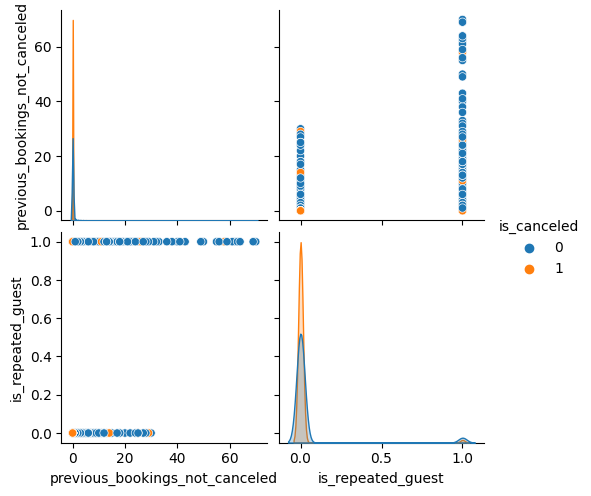

In [ ]:
sns.pairplot(archivo_train, vars = ["previous_bookings_not_canceled", "is_repeated_guest"],hue = "is_canceled")


Se puede ver que cuando se trata de un huesped repetido, ese huesped tiene un mayor número de reservas no canceladas. También se puede ver que cuando el huesped ya tiene una cantidad de reservas viejas no canceladas es más probable que no cancele la reserva actual

Gracias a este gráfico se puede ver la relación entre la variable "adr" y "children"

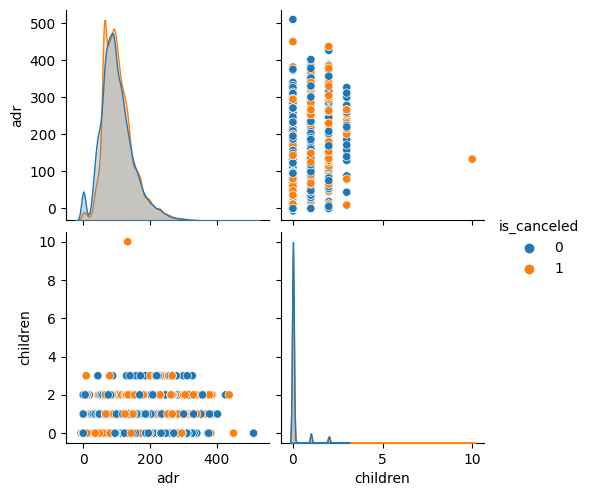

In [43]:
sns.pairplot(archivo_train, vars = ["adr", "children"],hue = "is_canceled")

Aquí se puede ver que casi todos llevan hasta 3 niños y el precio promedio no varía, manteniendose bastante similar llevando distintas cantidades de niños. La mayoría de los huéspedes que llevan niños tienen más probabilidad de que no cancelen la reserva.  

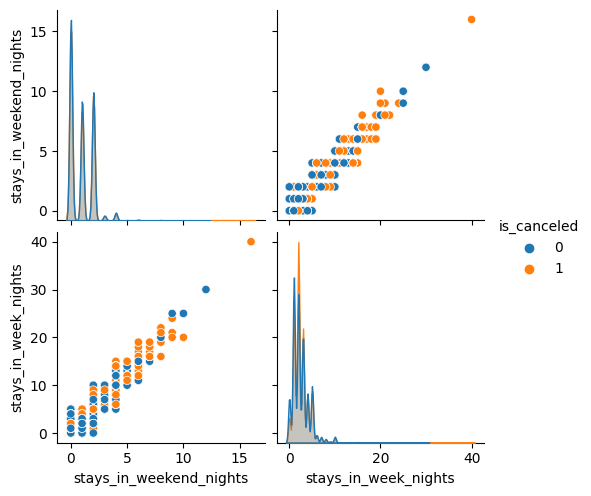

In [ ]:
sns.pairplot(archivo_train, vars = ["stays_in_weekend_nights", "stays_in_week_nights"],hue = "is_canceled")


Acá se puede ver una relación bastante lineal, esto se puede deber a que la mayoría de los huespedes se quedaron una cantidad de noches similares de fin de semana y entre semana, en proporción a la cantidad de noches que hay en un fin de semana y en una semana.

Este gráfico permite ver la correlación de las variables arrival_date_year y arrival_date_week_number

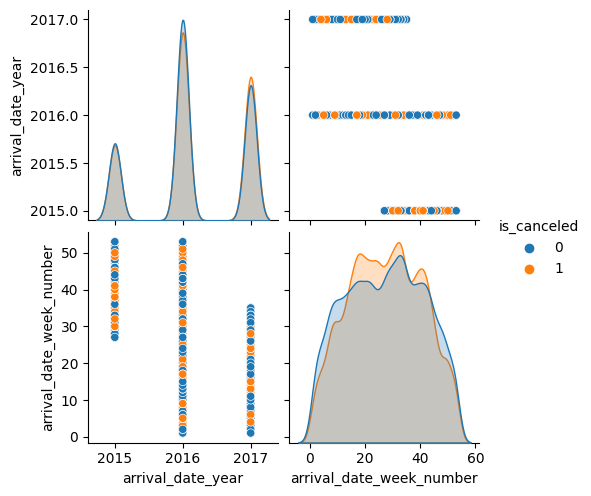

In [ ]:
sns.pairplot(archivo_train, vars = ["arrival_date_year", "arrival_date_week_number"],hue = "is_canceled")


Aquí se puede ver que en el año 2015, se recibieron más huespedes en la segunda mitad del año. En el año 2016, se recibieron huespedes durante todo el año y en el año 2017 se recibieron huespedes en las primeras tres cuartas partes del año

# Análisis de datos faltantes


In [ ]:
archivo_train.isnull().sum()


hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             221
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              7890
company                           58761
days_in_waiting_list                  0


In [ ]:
archivo_train.isnull().sum() *100 / len(archivo_train.index)

hotel                              0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.006461
babies                             0.000000
meal                               0.000000
country                            0.356952
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
agent                           

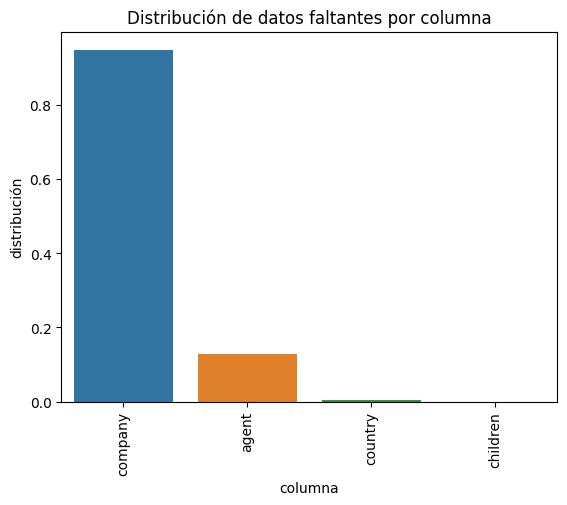

In [ ]:
cantidad_de_datos_nulos_por_columna = archivo_train.isna().sum()
frecuencia_relativa = cantidad_de_datos_nulos_por_columna / archivo_train.shape[0]
frecuencia_relativa = frecuencia_relativa[frecuencia_relativa.values != 0]
frecuencia_relativa = frecuencia_relativa.sort_values(ascending=False)

ax = sns.barplot(x=frecuencia_relativa.index, y=frecuencia_relativa.values)
ax.set(
    title="Distribución de datos faltantes por columna",
    xlabel="columna",
    ylabel="distribución",
)
ax.tick_params("x", labelrotation=90)

Vemos que el casi el 95% de la columna company está faltante, entonces podríamos eliminarla 

In [ ]:
archivo_train.drop("company", axis=1)
archivo_train.head(5)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,NaN,0,Transient,115.5,0,1,Canceled,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,NaN,0,Transient,42.0,1,0,Check-Out,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,NaN,0,Transient,229.0,0,2,Check-Out,2016-10-14,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,NaN,0,Transient,75.0,0,0,Canceled,2016-11-29,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,NaN,0,Transient-Party,75.0,0,1,Check-Out,2017-03-26,28c75445-c603-413a-babf-ad377018b592,0



Algunas estrategias para imputar los datos faltantes son:

- Sustitución de Casos: Se reemplaza con valores no observados. Hay que consultar con un experto.
- Sustitución por Media: Se reemplaza utilizando la medida calculada de los valores presentes. Sin embargo, esto trae consecuencias
    - La varianza estimada por la nueva variable no es válida ya que es atenuada por los valores repetidos
    - Se distorsiona la distribución
    - Las correlaciones que se observen estarán deprimidas debido a la repetición de un solo valor constante.
- Imputación Cold Deck: Se pueden obtener los datos faltantes a partir de otras variables del dataset.
- Imputacion Hot Deck: Se reemplazan los datos faltante con los valores que resultan más “similares”. Tenemos que definir qué es “similar”, para ello se puede usar la técnica: K vecinos más cercanos.
- Imputación por Regresión: El dato faltante se reemplaza con el valor predicho por un modelo de regresión.
- MICE (multivariate imputation by chained equations): Trabaja bajo el supuesto de que el origen de los datos es MAR (missing at random). Es un proceso de imputación iterativo, donde en cada iteración los valores faltantes se predicen en función de las variables restantes. El proceso se repite hasta que se encuentre consistencia en los datos (usualmente 10 iteraciones es suficiente). La primera iteración se realiza por uno de los métodos vistos anteriormente para rellenar los datos faltantes.



Para las variables agent, country y children se podría reemplazar los valores nulos por su media, ya que es muy chico el porcentaje de valores nulos.

Gráfico de densidad previo a las imputaciones

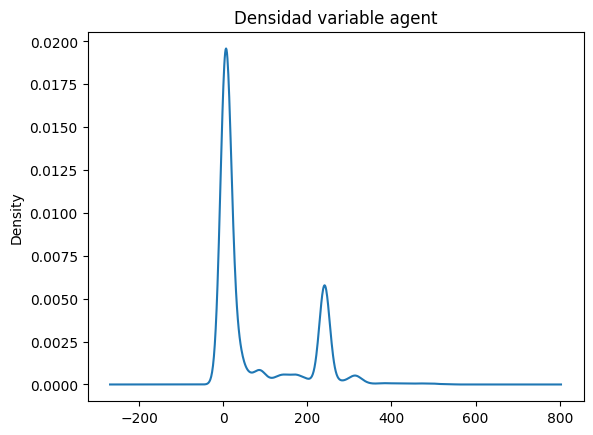

In [ ]:
grf=archivo_train['agent'].plot.kde(title="Densidad variable agent",xlabel="Agent",ylabel="Densidad")

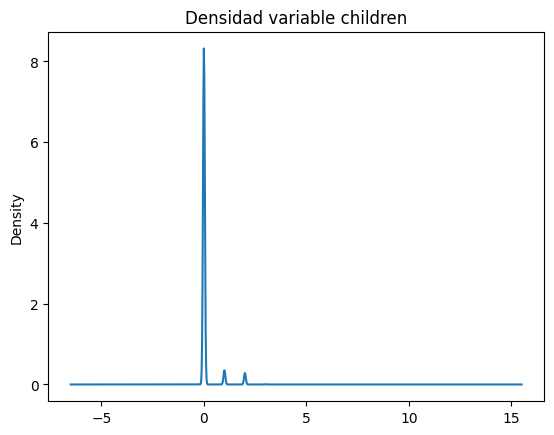

In [ ]:

otro=archivo_train['children'].plot.kde(title="Densidad variable children",xlabel="Children",ylabel="Densidad")

In [ ]:
columnas_faltantes = ["agent", "country", "children"]
for indice in columnas_faltantes:
  if indice == "agent":
    archivo_train.fillna({"agent": -1}, inplace=True)
    archivo_train.replace({-1:84.54101031042333})
  elif indice == "children":
    archivo_train.fillna({"children": -1}, inplace=True)
    archivo_train.replace({-1:0.10489589558868662})

archivo_train.isnull().sum() *100 / len(archivo_train.index)

hotel                              0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.000000
babies                             0.000000
meal                               0.000000
country                            0.356952
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
agent                           

Aquí se puede ver que en la columna agent y children ya no hay espacios nulos.

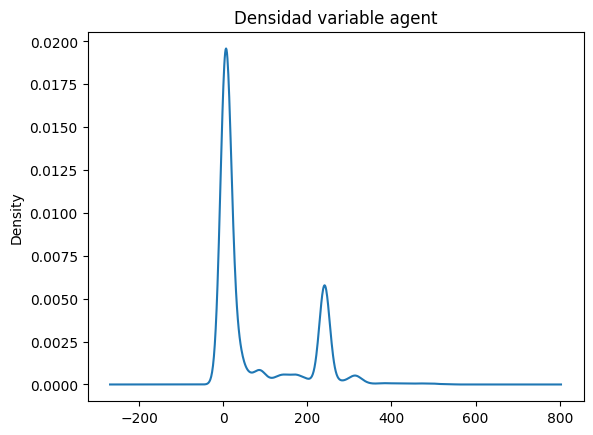

In [ ]:
grf=archivo_train['agent'].plot.kde(title="Densidad variable agent",xlabel="Age",ylabel="Densidad")

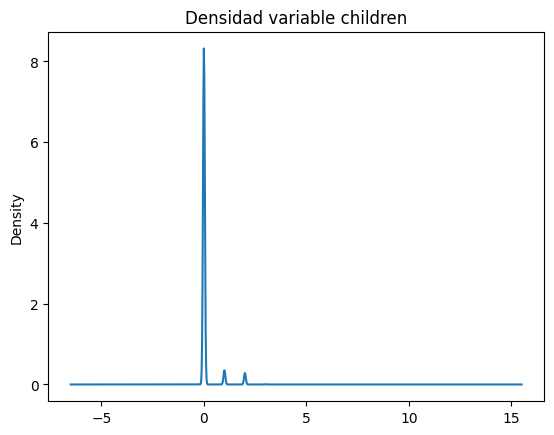

In [ ]:
otro=archivo_train['children'].plot.kde(title="Densidad variable children",xlabel="Children",ylabel="Densidad")

Podemos ver que las distribuciones después de las imputaciones son bastante similares, esto se debe a que el porcentaje de valores nulos era bastante pequeño y que se hayan llenado esos valores con la media no marca ninguna diferencia

#Análisis de valores atípicos

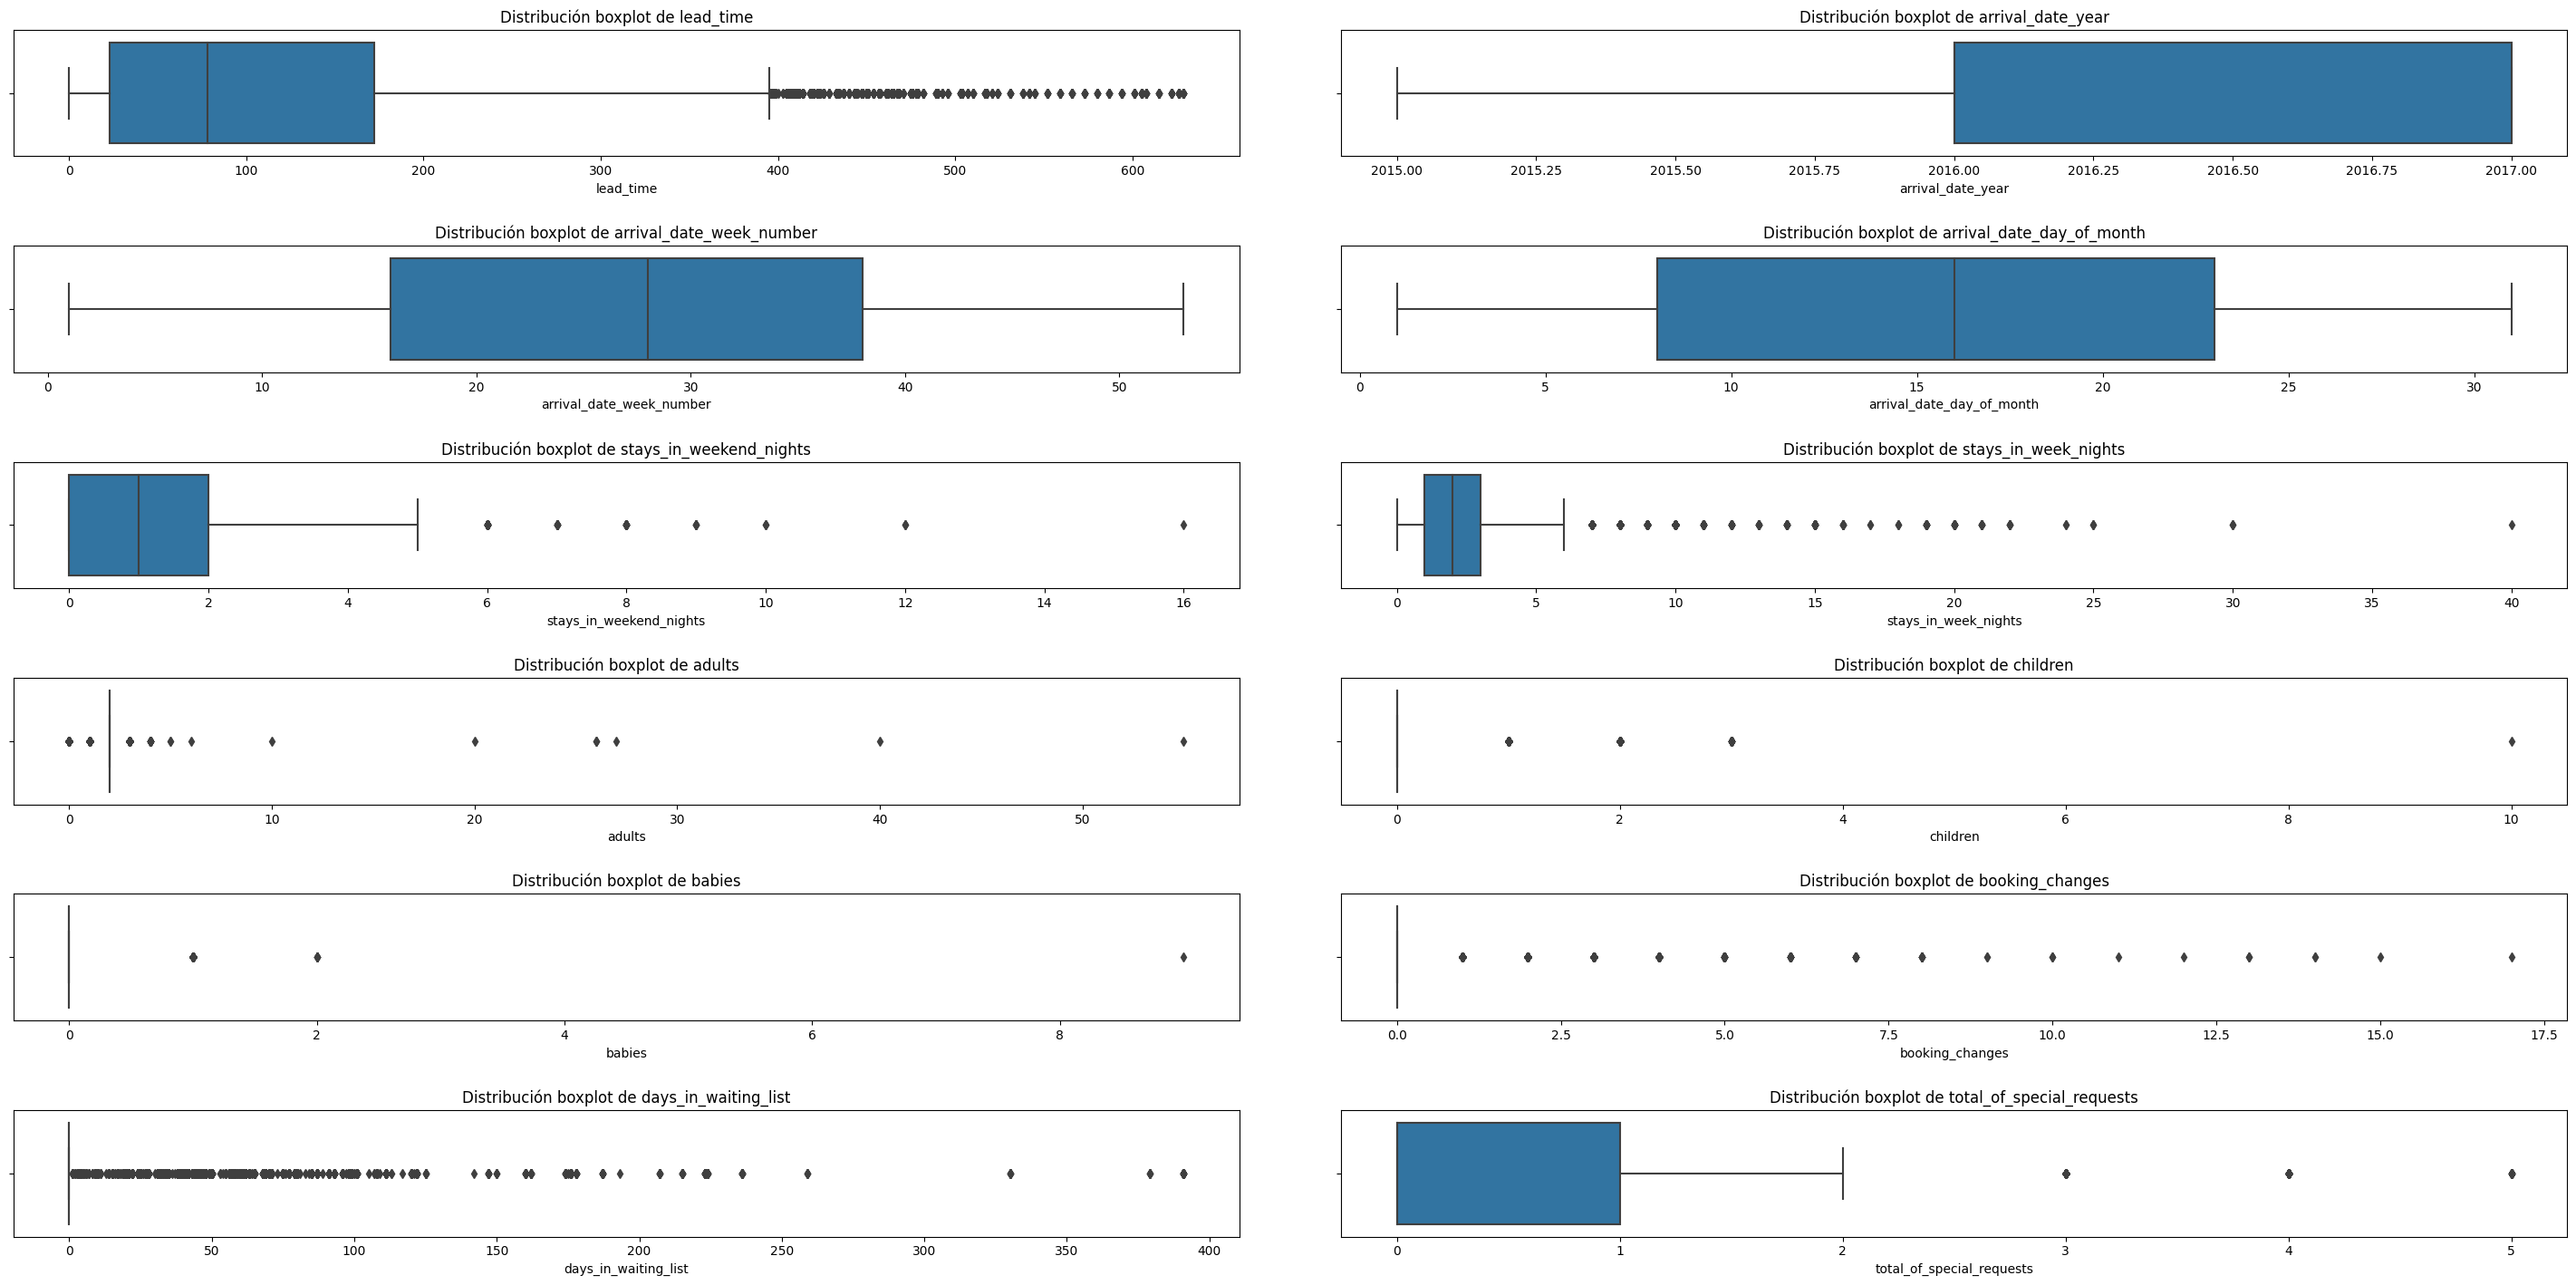

In [ ]:
figs, axes = plt.subplots(nrows=6, ncols=2, figsize=(30, 15))
figs.tight_layout(pad=5)
axes = np.ndarray.flatten(axes)
for (i, columna) in enumerate(variables_cuantitativas_discretas.columns):
    grafico = sns.boxplot(ax=axes[i], x=variables_cuantitativas_discretas[columna])
    grafico.set(xlabel=columna)
    grafico.set(title=f"Distribución boxplot de {columna}")


# Transformación de datos


## misassigned_room (Habitación mal asignada)

Consideramos que una varible importante que se debería tener en cuenta es si se asignó correctamente la habitación en relación a la reserva, es por esto que creamos la varibale "misassigned_room" que representa si se asignó mal la habitación.

In [ ]:
reservas_mal_asignadas = archivo_train['assigned_room_type'] != archivo_train['reserved_room_type']
archivo_train['misassigned_room'] = reservas_mal_asignadas
archivo_train['misassigned_room'].value_counts()

False    55489
True      6424
Name: misassigned_room, dtype: int64

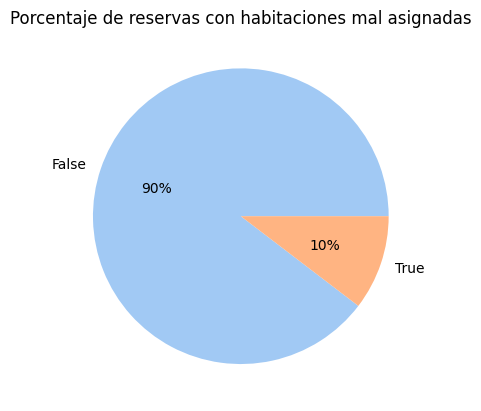

In [ ]:
data = [archivo_train['misassigned_room'].value_counts()[0]/len(archivo_train.index), 
        archivo_train['misassigned_room'].value_counts()[1]/len(archivo_train.index)]

labels = ['False', 'True']


colors = sns.color_palette("pastel")[0:9]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Porcentaje de reservas con habitaciones mal asignadas")
plt.show()

La mayoría de las habitaciones están bien asignadas

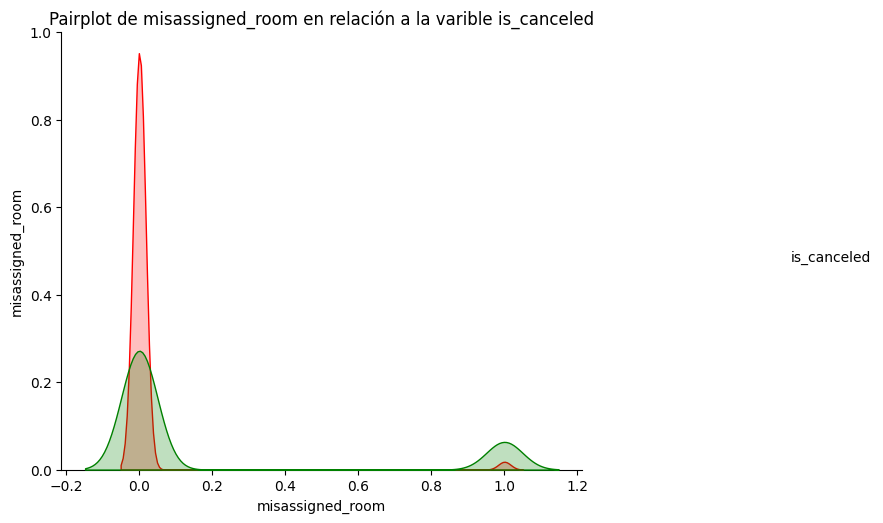

In [ ]:
columns=['misassigned_room', 'is_canceled']
ds_pairplot=archivo_train[columns].copy()
graf_pairplot=sns.pairplot(data=ds_pairplot, hue="is_canceled", palette=["g", "r"]).set(title="Pairplot de misassigned_room en relación a la varible is_canceled")
graf_pairplot.fig.set_size_inches(10,6)

Se nota una fuerte tendencia de cancelaciones cuando